In [1196]:
!pip install pyforest
from pyforest import *
lazy_imports()

['from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.linear_model import Lasso',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from pathlib import Path',
 'from sklearn.model_selection import KFold',
 'import statistics',
 'import pickle',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.linear_model import ElasticNet',
 'import tqdm',
 'import matplotlib as mpl',
 'import awswrangler as wr',
 'from sklearn.preprocessing import LabelEncoder',
 'from dask import dataframe as dd',
 'import plotly.express as px',
 'import altair as alt',
 'import matplotlib.pyplot as plt',
 'import fbprophet',
 'import dash',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import numpy as np',
 'from sklearn.preprocess

In [1197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1198]:
df=pd.read_csv('smartwatches.csv')
df.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings                Model Name                \
0    4.0           65.0        Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1    4.3        20788.0                                       BSW046   
2    3.8        21724.0                                    Wave Call   
3    4.3        13244.0                                       BSW053   
4    4.1        13901.0       Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0     NaN         NaN            NaN         NaN             8.0           
1     NaN         NaN        Silicon         Yes             3.5           
2     NaN         NaN        Silicon         Yes             8.0           
3     NaN         NaN        Silicon         Yes             3.5           
4     NaN         NaN          Other         Yes             8.0           

  Bluetooth Display Size   Weight    
0     Yes           NaN   35 - 50 g  
1     Yes    1.8 inches   50 - 75 g  
2     Yes    1.7 inches   35 - 50 g  
3     Yes    1.8 inches       75g +  
4     Yes    1.7 inches   35 - 50 g

In [1199]:
df

Unnamed: 0    Brand     Current Price  Original Price  \
0          0          noise     82990.0         89900.0      
1          1     fire-boltt      3799.0         16999.0      
2          2           boat      1999.0          7990.0      
3          3     fire-boltt      1799.0         19999.0      
4          4          noise      1599.0          4999.0      
5          5          noise      1499.0          3999.0      
6          6          noise      1999.0          4999.0      
7          7          noise      1799.0          3999.0      
8          8          noise      1999.0          6499.0      
9          9          noise      1999.0          5999.0      
10        10          noise      1999.0          5999.0      
11        11          noise      1799.0          3999.0      
12        12          noise      3799.0          7999.0      
13        13          noise      3499.0          5999.0      
14        14          noise      1999.0          5999.0      
15        15          noise      1499.0          4999.0      
16        16          noise      1799.0          4999.0      
17        17          noise      1999.0          5999.0      
18        18          noise      1999.0          5999.0      
19        19          noise      2499.0          5999.0      
20        20          noise      1799.0          3999.0      
21        21          noise      2999.0          5999.0      
22        22           boat      2699.0          7990.0      
23        23           boat      2499.0          7990.0      
24        24           boat      1999.0          7990.0      
25        25           boat      1199.0          6990.0      
26        26           boat      1799.0          6990.0      
27        27           boat      1999.0          7990.0      
28        28           boat      2599.0          7990.0      
29        29           boat      1999.0          7990.0      
30        30           boat      1999.0          7990.0      
31        31           boat      1199.0          6990.0      
32        32          noise      1799.0          4999.0      
33        33           boat      1699.0          6990.0      
34        34          noise      1799.0          4999.0      
35        35           boat      1199.0          6990.0      
36        36           boat      1449.0          5990.0      
37        37           boat      1899.0          6499.0      
38        38           boat      2199.0          7999.0      
39        39          honor     11499.0         18999.0      
40        40          honor      2199.0          1868.0      
41        41          honor     11499.0          9773.0      
42        42          honor     14999.0         12499.0      
43        43     crossbeats      2999.0          9999.0      
44        44          honor      8999.0         14999.0      
45        45     crossbeats      5999.0         14999.0      
46        46          honor      8999.0          7473.0      
47        47        samsung     11999.0         30990.0      
48        48        samsung     18410.0         37999.0      
49        49        samsung         NaN             NaN      
50        50        samsung     17999.0         19990.0      
51        51        samsung     18000.0         34999.0      
52        52         garmin     16990.0         22490.0      
53        53         garmin     27990.0         36490.0      
54        54         garmin         NaN             NaN      
55        55         garmin     18990.0         27990.0      
56        56         garmin         NaN             NaN      
57        57         garmin     34990.0         51990.0      
58        58         garmin         NaN             NaN      
59        59         garmin     20990.0         25990.0      
60        60         garmin     18990.0         20490.0      
61        61         garmin     78490.0         89460.0      
62        62         huawei     26581.0         42513.0      
63        63         huawei     16499

### Data Preprocessing

In [1200]:
df.shape

(450, 16)

In [1201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

In [1202]:
df.describe()

Unnamed: 0  Current Price  Original Price  Discount Percentage  \
count  450.000000     440.000000     377.000000       377.000000        
mean   224.500000   12747.554545   14598.204244        48.236894        
std    130.048068   17760.666099   15450.028869        24.109830        
min      0.000000    1199.000000    1669.000000       -79.688436        
25%    112.250000    2180.750000    5999.000000        33.337037        
50%    224.500000    3999.000000    7999.000000        54.550414        
75%    336.750000   17121.750000   17999.000000        66.677780        
max    449.000000  139990.000000   96390.000000        91.004550        

         Rating    Number OF Ratings  Battery Life (Days)  
count  444.000000       391.000000        418.000000       
mean     4.031306     11594.726343         14.077392       
std      0.550548     40423.889227          7.718503       
min      1.000000         1.000000          0.750000       
25%      3.900000        68.500000          8.000000       
50%      4.100000       996.000000         17.500000       
75%      4.300000      6022.000000         22.000000       
max      5.000000    619130.000000         22.000000

In [1203]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [1204]:
print(f'Columns with % of null values in the column')
for column in df:
    print(f'{column} : {((df[column].isnull().sum()*100)/len(df)).round()}')

Columns with % of null values in the column
Unnamed: 0 : 0.0
Brand : 0.0
Current Price : 2.0
Original Price : 16.0
Discount Percentage : 16.0
Rating : 1.0
Number OF Ratings : 13.0
Model Name : 8.0
Dial Shape : 27.0
Strap Color : 27.0
Strap Material : 15.0
Touchscreen : 8.0
Battery Life (Days) : 7.0
Bluetooth : 1.0
Display Size : 7.0
Weight : 41.0


In [1205]:
print('Dropind the columns columns with null values more than 80%')

for column in df:
    if (((df[column].isnull().sum())*100)/len(df)).round() >= 80:
       df=df.drop(columns=[column], axis=1)

for column in df:
    print(f'{column} : {((df[column].isnull().sum()*100)/len(df)).round()}')

Dropind the columns columns with null values more than 80%
Unnamed: 0 : 0.0
Brand : 0.0
Current Price : 2.0
Original Price : 16.0
Discount Percentage : 16.0
Rating : 1.0
Number OF Ratings : 13.0
Model Name : 8.0
Dial Shape : 27.0
Strap Color : 27.0
Strap Material : 15.0
Touchscreen : 8.0
Battery Life (Days) : 7.0
Bluetooth : 1.0
Display Size : 7.0
Weight : 41.0


<IPython.core.display.Javascript object>

<Axes: >

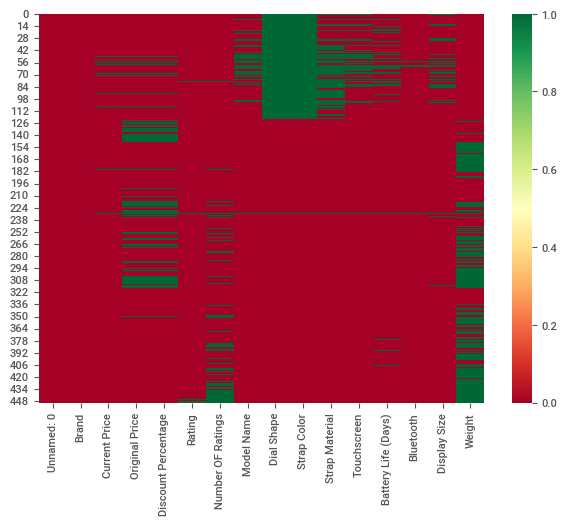

In [1206]:
# visualising the null values
sns.heatmap(df.isnull(), cmap='RdYlGn')   # visualising the null values

In [1207]:
df.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings                Model Name                \
0    4.0           65.0        Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1    4.3        20788.0                                       BSW046   
2    3.8        21724.0                                    Wave Call   
3    4.3        13244.0                                       BSW053   
4    4.1        13901.0       Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0     NaN         NaN            NaN         NaN             8.0           
1     NaN         NaN        Silicon         Yes             3.5           
2     NaN         NaN        Silicon         Yes             8.0           
3     NaN         NaN        Silicon         Yes             3.5           
4     NaN         NaN          Other         Yes             8.0           

  Bluetooth Display Size   Weight    
0     Yes           NaN   35 - 50 g  
1     Yes    1.8 inches   50 - 75 g  
2     Yes    1.7 inches   35 - 50 g  
3     Yes    1.8 inches       75g +  
4     Yes    1.7 inches   35 - 50 g

## Current Price

<IPython.core.display.Javascript object>

<Axes: xlabel='Current Price', ylabel='Density'>

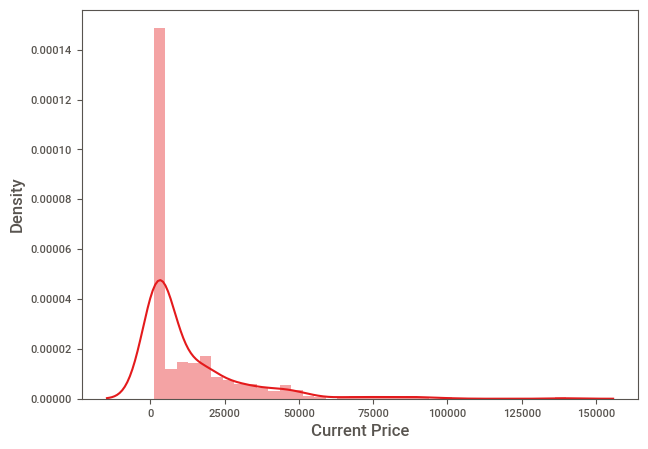

In [1208]:
sns.distplot(df['Current Price'].dropna())

# graph is not symmetry

<IPython.core.display.Javascript object>

<Axes: xlabel='Current Price'>

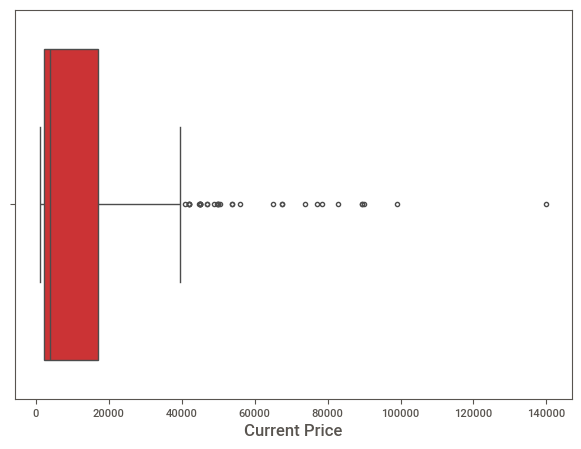

In [1209]:
sns.boxplot(x=df['Current Price'])

# so many outliers present

### if data distribution is not symmetric and have outliers than use median
### if data distribution is symmetric and no outliers than use mean

In [1210]:
skewness = df['Current Price'].skew()
print(f'Skewness of Current Price: {skewness}')

Skewness of Current Price: 2.7243756109561494


In [1211]:
if skewness<0.5:
    df['Current Price'] = df['Current Price'].fillna(df['Current Price'].mean())
else:
    df['Current Price'] = df['Current Price'].fillna(df['Current Price'].median())

In [1212]:
df['Current Price'].isnull().sum()

0

In [1213]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

## Original Price

<IPython.core.display.Javascript object>

<Axes: xlabel='Original Price', ylabel='Density'>

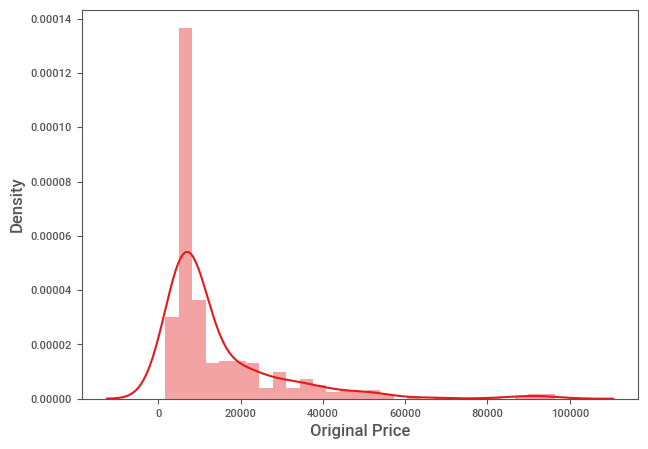

In [1214]:
sns.distplot(df['Original Price'].dropna())

# distribution is not symmetry

<IPython.core.display.Javascript object>

<Axes: ylabel='Original Price'>

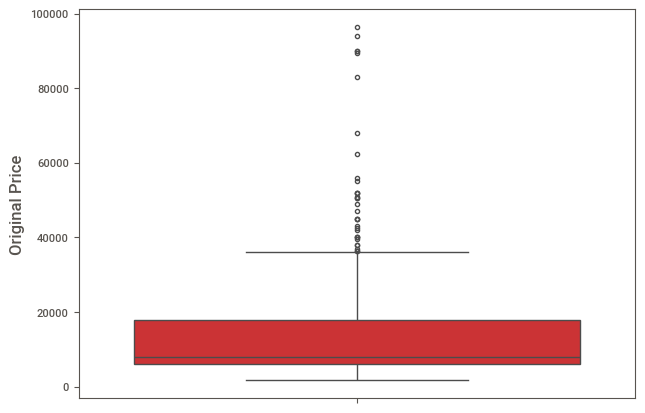

In [1215]:
sns.boxplot(df['Original Price'])

# too many outliers are present

In [1216]:
Original_Price_skewness = df['Original Price'].skew()
print(f" ['Original Price']-skewness : {Original_Price_skewness}")

 ['Original Price']-skewness : 2.668311152241214


In [1217]:
if Original_Price_skewness<0.5:
    df['Original Price']=df['Original Price'].fillna(df['Original Price'].mean())
else:
    df['Original Price']=df['Original Price'].fillna(df['Original Price'].median())

In [1218]:
df.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings                Model Name                \
0    4.0           65.0        Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1    4.3        20788.0                                       BSW046   
2    3.8        21724.0                                    Wave Call   
3    4.3        13244.0                                       BSW053   
4    4.1        13901.0       Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0     NaN         NaN            NaN         NaN             8.0           
1     NaN         NaN        Silicon         Yes             3.5           
2     NaN         NaN        Silicon         Yes             8.0           
3     NaN         NaN        Silicon         Yes             3.5           
4     NaN         NaN          Other         Yes             8.0           

  Bluetooth Display Size   Weight    
0     Yes           NaN   35 - 50 g  
1     Yes    1.8 inches   50 - 75 g  
2     Yes    1.7 inches   35 - 50 g  
3     Yes    1.8 inches       75g +  
4     Yes    1.7 inches   35 - 50 g

In [1219]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

## Discount Percentage

<Axes: xlabel='Discount Percentage', ylabel='Count'>

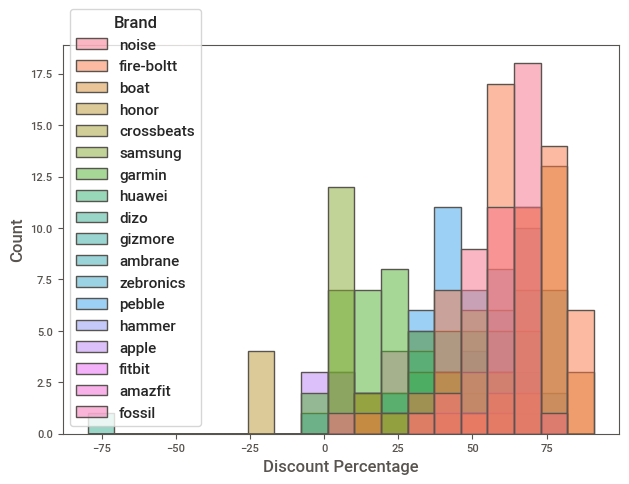

In [1220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
sns.histplot(data=df, hue='Brand', x='Discount Percentage')

<Axes: xlabel='Discount Percentage'>

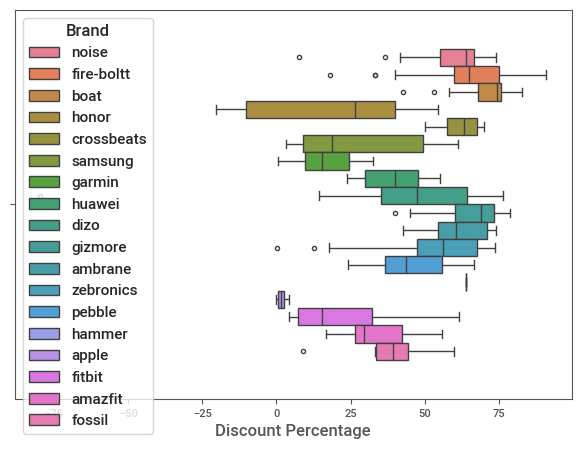

In [1221]:
sns.boxplot(data=df, hue='Brand', x='Discount Percentage')

# noise, fire-boltt, boat,

In [1222]:
print(df.groupby('Brand')['Discount Percentage'].median().round())

Brand
amazfit       30.0
ambrane       61.0
apple          2.0
boat          74.0
crossbeats    63.0
dizo          48.0
fire-boltt    65.0
fitbit        15.0
fossil        39.0
garmin        15.0
gizmore       69.0
hammer        64.0
honor         27.0
huawei        40.0
noise         64.0
pebble        44.0
samsung       19.0
zebronics     56.0
Name: Discount Percentage, dtype: float64


In [1223]:
# null values in all brands

df[df['Discount Percentage'].isnull()][['Discount Percentage','Brand']].Brand.value_counts()

Brand
apple         20
fitbit        15
fossil        15
garmin        12
samsung        3
huawei         2
dizo           1
fire-boltt     1
pebble         1
zebronics      1
boat           1
gizmore        1
Name: count, dtype: int64

In [1224]:
Brands = {
'amazfit'   :    30.0,
'ambrane'    :    61.0,
'apple'   :  2.0,
'boat'     :     74.0,
'crossbeats':    63.0,
'dizo'       :   48.0,
'fire-boltt'  :  65.0,
'fitbit'    :    15.0,
'fossil'     :   39.0,
'garmin'      :  15.0,
'gizmore'  :     69.0,
'hammer'    :    64.0,
'honor'      :   27.0,
'huawei'      :  40.0,
'noise'    :     64.0,
'pebble'    :    44.0,
'samsung'    :   19.0,
'zebronics'   :  56.0 
}

df['Discount Percentage']=df['Discount Percentage'].fillna(df['Brand'].map(Brands))

In [1225]:
"""
# filling all null values of 'Discount Percentage' according to 'Brand'

dddef dis_per(x):
    if pd.isnull(x['Discount Percentage']):
        if x.Brand=='apple':
            return 2
        elif x.Brand=='fitbit':
            return 15
        elif x.Brand=='fossil':
            return 39
        elif x.Brand=='garmin':
            return 15
        elif x.Brand=='samsung':
            return 19
        elif x.Brand=='huawei':
            return 40
        elif x.Brand=='fdizo':
            return 48
        elif x.Brand=='fire-boltt     ':
            return 65
        elif x.Brand=='pebble':
            return 44
        elif x.Brand=='zebronics':
            return 56
        elif x.Brand=='boat':
            return 74
        
        else:
            return 69
    else:
        return x['Discount Percentage']

df['Discount Percentage'] = df.apply(dis_per, axis=1)

"""

"\n# filling all null values of 'Discount Percentage' according to 'Brand'\n\ndddef dis_per(x):\n    if pd.isnull(x['Discount Percentage']):\n        if x.Brand=='apple':\n            return 2\n        elif x.Brand=='fitbit':\n            return 15\n        elif x.Brand=='fossil':\n            return 39\n        elif x.Brand=='garmin':\n            return 15\n        elif x.Brand=='samsung':\n            return 19\n        elif x.Brand=='huawei':\n            return 40\n        elif x.Brand=='fdizo':\n            return 48\n        elif x.Brand=='fire-boltt     ':\n            return 65\n        elif x.Brand=='pebble':\n            return 44\n        elif x.Brand=='zebronics':\n            return 56\n        elif x.Brand=='boat':\n            return 74\n        \n        else:\n            return 69\n    else:\n        return x['Discount Percentage']\n\ndf['Discount Percentage'] = df.apply(dis_per, axis=1)\n\n"

In [1226]:
df.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings                Model Name                \
0    4.0           65.0        Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1    4.3        20788.0                                       BSW046   
2    3.8        21724.0                                    Wave Call   
3    4.3        13244.0                                       BSW053   
4    4.1        13901.0       Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0     NaN         NaN            NaN         NaN             8.0           
1     NaN         NaN        Silicon         Yes             3.5           
2     NaN         NaN        Silicon         Yes             8.0           
3     NaN         NaN        Silicon         Yes             3.5           
4     NaN         NaN          Other         Yes             8.0           

  Bluetooth Display Size   Weight    
0     Yes           NaN   35 - 50 g  
1     Yes    1.8 inches   50 - 75 g  
2     Yes    1.7 inches   35 - 50 g  
3     Yes    1.8 inches       75g +  
4     Yes    1.7 inches   35 - 50 g

In [1227]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

## Rating

<Axes: xlabel='Rating', ylabel='Count'>

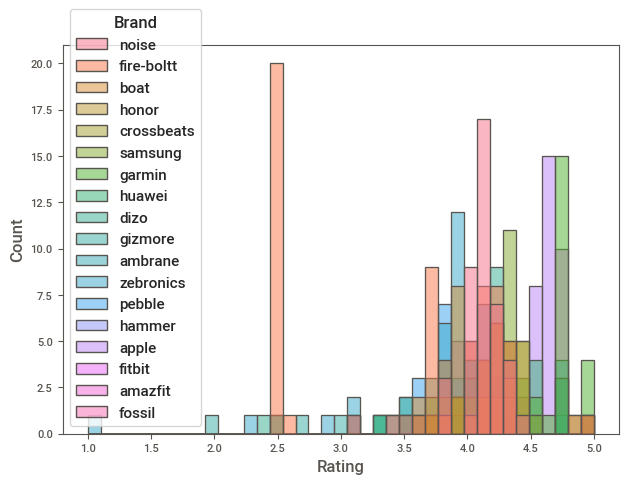

In [1228]:
sns.histplot(x='Rating', hue='Brand', data=df)

<Axes: xlabel='Rating'>

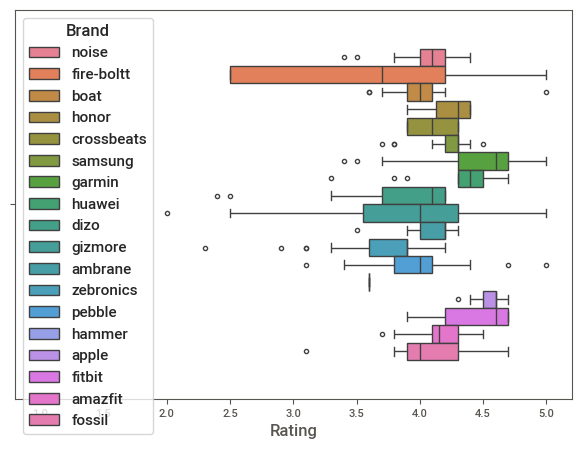

In [1229]:
sns.boxplot(x='Rating', hue='Brand', data=df)

In [1230]:
# print(df.groupby('Brand')['Rating'].value_counts())
print(df.groupby('Brand')['Rating'].value_counts())

Brand       Rating
amazfit     4.1        4
            4.3        4
            4.2        2
            4.5        1
            4.0        1
            3.8        1
            3.7        1
ambrane     4.2        6
            3.9        2
            4.3        1
            4.1        1
            3.5        1
apple       4.6       15
            4.5        8
            4.3        1
            4.7        1
            4.4        1
boat        3.9        8
            4.2        6
            4.0        5
            3.8        4
            4.1        4
            3.6        2
            5.0        1
            3.7        1
crossbeats  4.3        2
            3.9        2
dizo        4.2        9
            4.1        4
            4.0        3
            3.7        3
            3.9        2
            2.4        1
            3.3        1
            2.5        1
            3.6        1
fire-boltt  2.5       20
            3.7        9
            4.1        8
      

In [1231]:
df.groupby('Brand')['Rating'].median()

Brand
amazfit       4.15
ambrane       4.20
apple         4.60
boat          4.00
crossbeats    4.10
dizo          4.10
fire-boltt    3.70
fitbit        4.60
fossil        4.00
garmin        4.60
gizmore       4.00
hammer        3.60
honor         4.30
huawei        4.40
noise         4.10
pebble        4.00
samsung       4.30
zebronics     3.90
Name: Rating, dtype: float64

In [1232]:
df[df.Rating.isnull()][['Brand','Rating']]

Brand     Rating
38         boat   NaN  
78      gizmore   NaN  
231      fitbit   NaN  
446  fire-boltt   NaN  
448  fire-boltt   NaN  
449  fire-boltt   NaN

In [1233]:
df[df.Rating.isnull()].Brand.value_counts()

Brand
fire-boltt    3
boat          1
gizmore       1
fitbit        1
Name: count, dtype: int64

In [1234]:
Rat_Brand = {
'fire-boltt':    3.7,
'boat'      :    4,
'gizmore'   :    4,
'fitbit'    :    4.6
}

df['Rating']=df['Rating'].fillna(df.Brand.map(Rat_Brand))

In [1235]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [1236]:
df.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings                Model Name                \
0    4.0           65.0        Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1    4.3        20788.0                                       BSW046   
2    3.8        21724.0                                    Wave Call   
3    4.3        13244.0                                       BSW053   
4    4.1        13901.0       Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0     NaN         NaN            NaN         NaN             8.0           
1     NaN         NaN        Silicon         Yes             3.5           
2     NaN         NaN        Silicon         Yes             8.0           
3     NaN         NaN        Silicon         Yes             3.5           
4     NaN         NaN          Other         Yes             8.0           

  Bluetooth Display Size   Weight    
0     Yes           NaN   35 - 50 g  
1     Yes    1.8 inches   50 - 75 g  
2     Yes    1.7 inches   35 - 50 g  
3     Yes    1.8 inches       75g +  
4     Yes    1.7 inches   35 - 50 g

## Number OF Ratings

<Axes: ylabel='Density'>

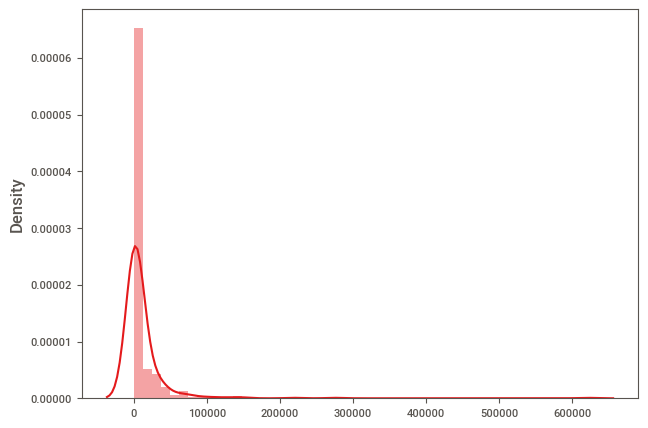

In [1237]:
sns.distplot(x=df['Number OF Ratings'])

<Axes: xlabel='Brand', ylabel='Number OF Ratings'>

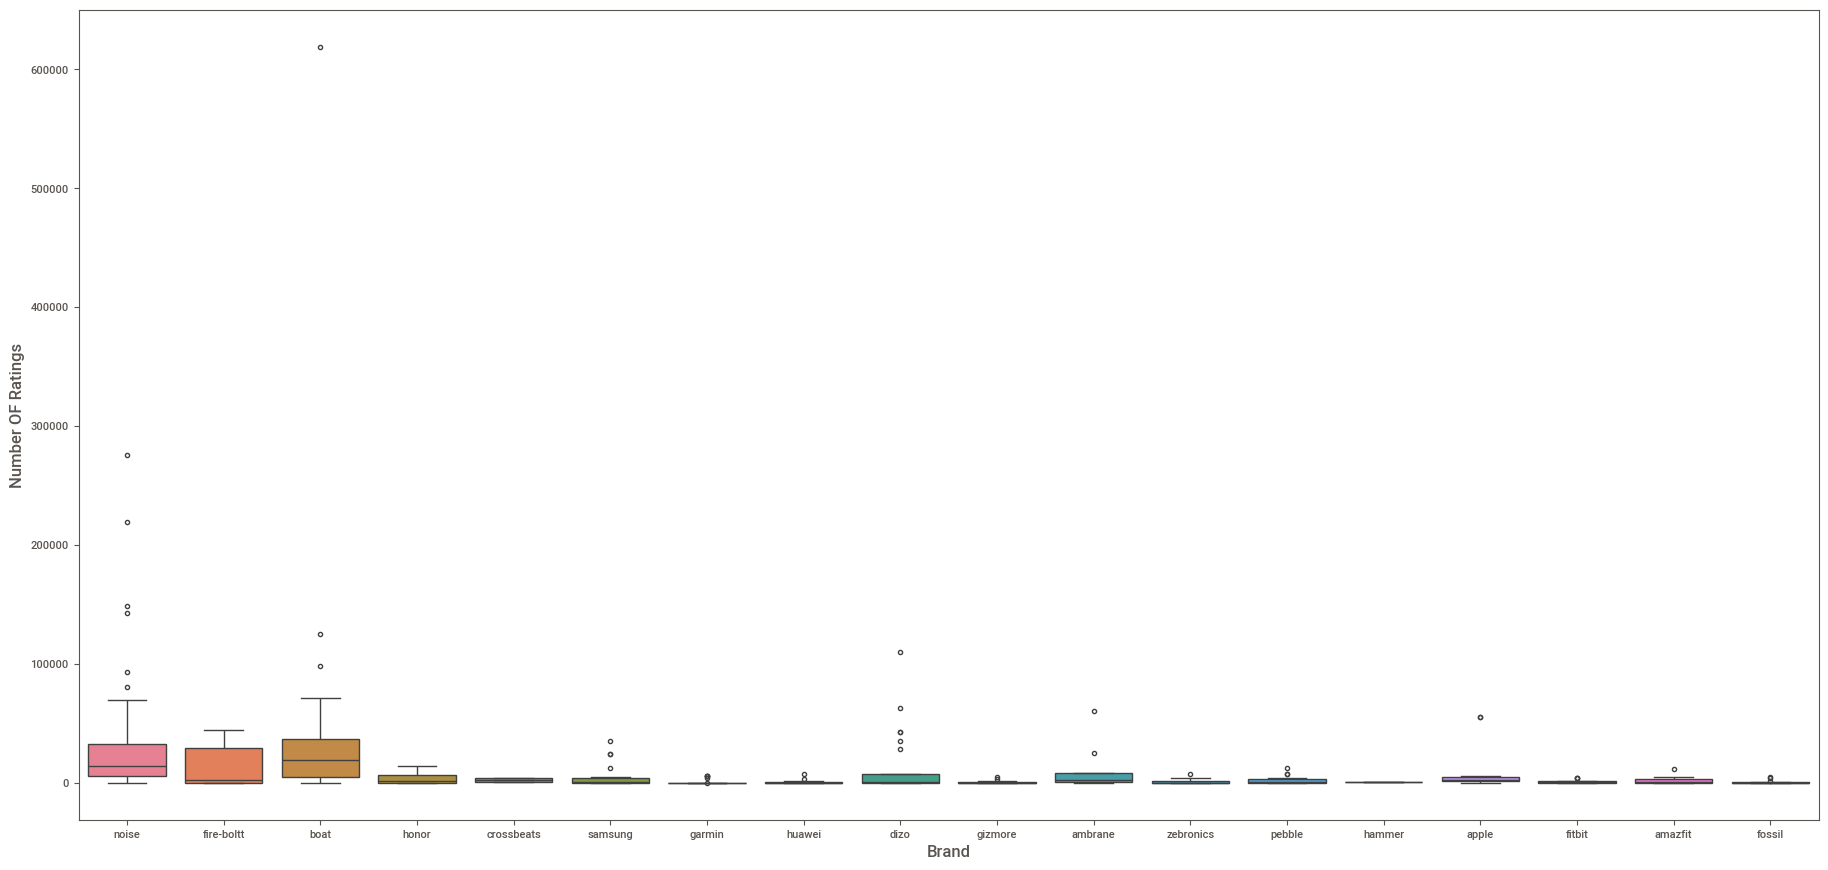

In [1238]:
plt.figure(figsize=(20,10))
sns.boxplot(y=df['Number OF Ratings'], x=df['Brand'], data=df, hue=df['Brand'])

In [1239]:
df.groupby(df['Brand'])['Number OF Ratings'].median()

Brand
amazfit         575.0
ambrane        2475.0
apple          2847.0
boat          19590.0
crossbeats     2426.0
dizo            663.0
fire-boltt     2571.0
fitbit          396.5
fossil          112.5
garmin           19.0
gizmore          69.5
hammer          516.0
honor          1445.0
huawei          196.0
noise         13901.0
pebble         1176.0
samsung         567.0
zebronics        77.5
Name: Number OF Ratings, dtype: float64

In [1240]:
df[df['Number OF Ratings'].isnull()]['Brand'].value_counts()

Brand
fire-boltt    25
fitbit         7
pebble         7
garmin         6
gizmore        5
zebronics      3
boat           2
fossil         2
amazfit        1
huawei         1
Name: count, dtype: int64

In [1241]:
# null values in df['Number OF Ratings'] with respect to 'Brands'

df['Number OF Ratings'].value_counts()

Number OF Ratings
6.0         10
3.0         10
5.0          8
2847.0       7
22.0         6
10.0         6
7.0          5
1519.0       5
567.0        5
6022.0       5
5502.0       5
32704.0      5
5228.0       4
4.0          4
13901.0      4
20.0         4
109.0        4
435.0        3
1489.0       3
11.0         3
14613.0      3
102.0        3
27771.0      3
71481.0      3
18.0         3
2.0          3
39274.0      3
2138.0       3
33012.0      3
21724.0      3
1990.0       2
23302.0      2
55800.0      2
3856.0       2
55.0         2
1611.0       2
65.0         2
88.0         2
23940.0      2
201.0        2
114.0        2
4475.0       2
8.0          2
1269.0       2
13.0         2
42860.0      2
7828.0       2
4240.0       2
1964.0       2
2874.0       2
1371.0       2
24.0         2
1980.0       2
1779.0       2
8765.0       2
25784.0      2
827.0        2
3944.0       2
39479.0      2
1.0          2
9081.0       2
19.0         2
100.0        2
33415.0      2
545.0        2
510.0  

In [1242]:
# filling all null values with median of respecture in df['Number OF Ratings'] with repect to 'Brands'
no_of_rati={
'fire-boltt' :    2571.0,
'fitbit'     :    396.5,
'pebble'     :    1176.0,
'garmin'     :    19.0,
'gizmore'    :    69.5,
'zebronics'  :    77.5,
'boat'       :    19590.0,
'fossil'     :    112.5,
'amazfit'    :    575.0,
'huawei'     :    196.0
}

df['Number OF Ratings']=df['Number OF Ratings'].fillna(df['Brand'].map(no_of_rati))

In [1243]:
df.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [1244]:
df.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings                Model Name                \
0    4.0           65.0        Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1    4.3        20788.0                                       BSW046   
2    3.8        21724.0                                    Wave Call   
3    4.3        13244.0                                       BSW053   
4    4.1        13901.0       Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0     NaN         NaN            NaN         NaN             8.0           
1     NaN         NaN        Silicon         Yes             3.5           
2     NaN         NaN        Silicon         Yes             8.0           
3     NaN         NaN        Silicon         Yes             3.5           
4     NaN         NaN          Other         Yes             8.0           

  Bluetooth Display Size   Weight    
0     Yes           NaN   35 - 50 g  
1     Yes    1.8 inches   50 - 75 g  
2     Yes    1.7 inches   35 - 50 g  
3     Yes    1.8 inches       75g +  
4     Yes    1.7 inches   35 - 50 g

## Model Name

In [1245]:
df['Model Name'].value_counts()

Model Name
beast pro                                                                           5
ring                                                                                5
Wave Call                                                                           3
Watch Flash                                                                         3
BSW024                                                                              3
starcross                                                                           2
BSW049                                                                              2
BSW030                                                                              2
BSW042                                                                              2
RING 3                                                                              2
NINJA PRO MAX                                                                       2
8.90E+12                                   

In [1246]:
a=df.copy()
a

Unnamed: 0    Brand     Current Price  Original Price  \
0          0          noise     82990.0         89900.0      
1          1     fire-boltt      3799.0         16999.0      
2          2           boat      1999.0          7990.0      
3          3     fire-boltt      1799.0         19999.0      
4          4          noise      1599.0          4999.0      
5          5          noise      1499.0          3999.0      
6          6          noise      1999.0          4999.0      
7          7          noise      1799.0          3999.0      
8          8          noise      1999.0          6499.0      
9          9          noise      1999.0          5999.0      
10        10          noise      1999.0          5999.0      
11        11          noise      1799.0          3999.0      
12        12          noise      3799.0          7999.0      
13        13          noise      3499.0          5999.0      
14        14          noise      1999.0          5999.0      
15        15          noise      1499.0          4999.0      
16        16          noise      1799.0          4999.0      
17        17          noise      1999.0          5999.0      
18        18          noise      1999.0          5999.0      
19        19          noise      2499.0          5999.0      
20        20          noise      1799.0          3999.0      
21        21          noise      2999.0          5999.0      
22        22           boat      2699.0          7990.0      
23        23           boat      2499.0          7990.0      
24        24           boat      1999.0          7990.0      
25        25           boat      1199.0          6990.0      
26        26           boat      1799.0          6990.0      
27        27           boat      1999.0          7990.0      
28        28           boat      2599.0          7990.0      
29        29           boat      1999.0          7990.0      
30        30           boat      1999.0          7990.0      
31        31           boat      1199.0          6990.0      
32        32          noise      1799.0          4999.0      
33        33           boat      1699.0          6990.0      
34        34          noise      1799.0          4999.0      
35        35           boat      1199.0          6990.0      
36        36           boat      1449.0          5990.0      
37        37           boat      1899.0          6499.0      
38        38           boat      2199.0          7999.0      
39        39          honor     11499.0         18999.0      
40        40          honor      2199.0          1868.0      
41        41          honor     11499.0          9773.0      
42        42          honor     14999.0         12499.0      
43        43     crossbeats      2999.0          9999.0      
44        44          honor      8999.0         14999.0      
45        45     crossbeats      5999.0         14999.0      
46        46          honor      8999.0          7473.0      
47        47        samsung     11999.0         30990.0      
48        48        samsung     18410.0         37999.0      
49        49        samsung      3999.0          7999.0      
50        50        samsung     17999.0         19990.0      
51        51        samsung     18000.0         34999.0      
52        52         garmin     16990.0         22490.0      
53        53         garmin     27990.0         36490.0      
54        54         garmin      3999.0          7999.0      
55        55         garmin     18990.0         27990.0      
56        56         garmin      3999.0          7999.0      
57        57         garmin     34990.0         51990.0      
58        58         garmin      3999.0          7999.0      
59        59         garmin     20990.0         25990.0      
60        60         garmin     18990.0         20490.0      
61        61         garmin     78490.0         89460.0      
62        62         huawei     26581.0         42513.0      
63        63         huawei     16499

In [1247]:
a['Model Name'].str.lower().unique()

array(['wrb-sw-colorfitpro4alpha-std-rgld_pnk', 'bsw046', 'wave call',
       'bsw053', 'wrb-sw-colorfitpulsegobuzz-std-blk_blk', 'nsw-05', nan,
       'wrb-sw-colorfitgrand-std-rpnk_rpnk',
       'wrb-sw-colorfitultrase-std-gld_brn',
       'wrb-sw-colorfitultra-std-gry_blk',
       'wrb-sw-colorfitpulse2max-std-blk_blk',
       'wrb-sw-colorfitgrand-std-grn_grn',
       'wrb-sw-colorfitpro4alpha-std-blk_blk', 'wrb-sw-force-std-blk_blk',
       'wrb-sw-colorfitultrabuzz-std-ogrn_ogrn',
       'wrb-sw-colorfitpro2-std-blk',
       'wrb-sw-colorfitpulsegobuzz-std-gry_gry',
       'wrb-sw-colorfitpulse2max-std-blu_blu',
       'wrb-sw-colorfitultrabuzz-std-blk_blk',
       'wrb-sw-colorfitgrand-std-blu_blu',
       'wrb-sw-colorfitpro4-std-slvr_org', '8.90e+12', 'watch flash',
       'watch blaze', 'wrb-sw-colorfitpulse2-std-blu_blu', 'wave lite',
       'wrb-sw-colorfitpulsegobuzz-std-grn_grn', 'boat wave call plus',
       'mus-b19', 'arg-b39-cr', 'mus-b19-cr', 'talos-b19s-cr', 'grit',

In [1248]:
a['Model Name']=a['Model Name'].str.strip()

a['Model Name']=a['Model Name'].str.lower()



In [1249]:
len(a['Model Name'].str.lower().unique())

386

In [1250]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

a['Model Name Encoded'] = le.fit_transform(a['Model Name'])
a.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings                Model Name                \
0    4.0           65.0        wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1    4.3        20788.0                                       bsw046   
2    3.8        21724.0                                    wave call   
3    4.3        13244.0                                       bsw053   
4    4.1        13901.0       wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0     NaN         NaN            NaN         NaN             8.0           
1     NaN         NaN        Silicon         Yes             3.5           
2     NaN         NaN        Silicon         Yes             8.0           
3     NaN         NaN        Silicon         Yes             3.5           
4     NaN         NaN          Other         Yes             8.0           

  Bluetooth Display Size   Weight    Model Name Encoded  
0     Yes           NaN   35 - 50 g          345         
1     Yes    1.8 inches   50 - 75 g           31         
2     Yes    1.7 inches   35 - 50 g          324         
3     Yes    1.8 inches       75g +           33         
4     Yes    1.7 inches   35 - 50 g          350

In [1251]:
a['Brand'].value_counts()

Brand
fire-boltt    60
noise         43
garmin        41
pebble        33
zebronics     33
boat          32
samsung       30
apple         26
dizo          25
fossil        24
gizmore       23
fitbit        21
huawei        15
honor         14
amazfit       14
ambrane       11
crossbeats     4
hammer         1
Name: count, dtype: int64

In [1252]:
df.groupby('Brand')['Model Name'].value_counts()

Brand       Model Name                                                                      
amazfit     Bip 3 Pro with 1.69 inch Large Color Display Built-in GPS                           1
            T rex Pro 1.3HD AMOLED with advanced GPS & 10ATM water resistance                   1
            Pop 2 with Ultra-large 1.78 inch HD AMOLED Display, BT Calling, SpO2                1
            GTS2 Mini with 1.55" AMOLED Display Built-in Alexa                                  1
            GTS 4 Alexa Built-in Fitness Tracker Calling 1.75'' HD Display SpO2 Waterproof      1
            GTS 3 1,75 HD AMOLED with advanced GPS and 150+ sports modes                        1
            GTR 4 1.43AMOLED display Bluetooth calling & 6 satellite GPS positioning system     1
            GTR 3 Pro                                                                           1
            GTR 3 1.3 HD AMOLED with Always on Display and powerful Zepp OS                     1
            GTR 2e       

In [1253]:
df.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings                Model Name                \
0    4.0           65.0        Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1    4.3        20788.0                                       BSW046   
2    3.8        21724.0                                    Wave Call   
3    4.3        13244.0                                       BSW053   
4    4.1        13901.0       Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0     NaN         NaN            NaN         NaN             8.0           
1     NaN         NaN        Silicon         Yes             3.5           
2     NaN         NaN        Silicon         Yes             8.0           
3     NaN         NaN        Silicon         Yes             3.5           
4     NaN         NaN          Other         Yes             8.0           

  Bluetooth Display Size   Weight    
0     Yes           NaN   35 - 50 g  
1     Yes    1.8 inches   50 - 75 g  
2     Yes    1.7 inches   35 - 50 g  
3     Yes    1.8 inches       75g +  
4     Yes    1.7 inches   35 - 50 g

In [1254]:
# droping the column

df1=df.drop(columns=['Model Name'], axis=1)

In [1255]:
df1.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

## Dial Shape

In [1256]:
df1['Dial Shape'].value_counts()

Dial Shape
Circle          131
Square          101
Rectangle        87
Curved            6
Contemporary      1
Oval              1
Name: count, dtype: int64

In [1257]:
# different brands with different names

df1.groupby('Brand')['Dial Shape'].value_counts()

Brand       Dial Shape  
amazfit     Circle           6
            Square           5
            Rectangle        3
ambrane     Square           6
            Circle           2
            Rectangle        1
apple       Rectangle       26
boat        Rectangle       12
            Square           4
dizo        Rectangle        9
            Square           5
            Circle           5
fire-boltt  Square          30
            Circle           5
            Rectangle        4
fitbit      Square           9
            Rectangle        5
            Curved           5
            Contemporary     1
fossil      Circle          24
garmin      Circle          27
            Square           4
gizmore     Square          10
            Circle           4
            Rectangle        1
honor       Circle           7
            Rectangle        1
huawei      Circle          11
            Rectangle        1
noise       Rectangle       10
            Square           6
            Ci

In [1258]:
# brands with null values with respect to ['Dial Shape']

df1[df1['Dial Shape'].isnull()].Brand.value_counts()

Brand
noise         24
fire-boltt    21
boat          16
zebronics     12
garmin        10
gizmore        8
honor          6
dizo           6
samsung        5
crossbeats     4
pebble         4
huawei         3
ambrane        2
hammer         1
fitbit         1
Name: count, dtype: int64

In [1259]:
# selectinf the first row of each brand from above 

# (df1.groupby('Brand')['Dial Shape'].value_counts()).groupby('Brand').head() ---> selecting all
(df1.groupby('Brand')['Dial Shape'].value_counts()).groupby('Brand').head(1)  # -----> selecting first row

Brand       Dial Shape
amazfit     Circle         6
ambrane     Square         6
apple       Rectangle     26
boat        Rectangle     12
dizo        Rectangle      9
fire-boltt  Square        30
fitbit      Square         9
fossil      Circle        24
garmin      Circle        27
gizmore     Square        10
honor       Circle         7
huawei      Circle        11
noise       Rectangle     10
pebble      Square        11
samsung     Circle        25
zebronics   Square        11
Name: count, dtype: int64

In [1260]:
# Fill the null values with the maximum dial shape for each brand
Dail_shape_brand = {
'amazfit'    :'Circle' ,        
'ambrane'    :'Square'   ,      
'apple'      :'Rectangle',     
'boat'       :'Rectangle',     
'dizo'       :'Rectangle' ,     
'fire-boltt' :'Square'  ,      
'fitbit'     :'Square' ,        
'fossil'     :'Circle',        
'garmin'     :'Circle' ,       
'gizmore'    :'Square'  ,      
'honor'      :'Circle',         
'huawei'     :'Circle' ,       
'noise'      :'Rectangle',     
'pebble'     :'Square',        
'samsung'    :'Circle' ,       
'zebronics'  :'Square' 
}


df1['Dial Shape'] = df1['Dial Shape'].fillna(df1.Brand.map(Dail_shape_brand))
df1['Dial Shape'].isnull().sum()

5

In [1261]:
df1['Brand'].value_counts()

Brand
fire-boltt    60
noise         43
garmin        41
pebble        33
zebronics     33
boat          32
samsung       30
apple         26
dizo          25
fossil        24
gizmore       23
fitbit        21
huawei        15
honor         14
amazfit       14
ambrane       11
crossbeats     4
hammer         1
Name: count, dtype: int64

In [1262]:
df1['Dial Shape'].value_counts()

Dial Shape
Circle          155
Square          149
Rectangle       133
Curved            6
Contemporary      1
Oval              1
Name: count, dtype: int64

In [1263]:
df1.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape               5
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [1264]:
df1[df1['Dial Shape'].isnull()][['Brand','Dial Shape']]  # null values with brands with repect to 'Dail Shape'

Brand    Dial Shape
43  crossbeats     NaN   
45  crossbeats     NaN   
94  crossbeats     NaN   
95  crossbeats     NaN   
97      hammer     NaN

In [1265]:
df2 =df1[df1['Dial Shape'].notnull()]  # deleting all brands with shape, color, matrial are null
df2.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape               0
Strap Color            118
Strap Material          64
Touchscreen             36
Battery Life (Days)     31
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

## Strap Color

In [1266]:
df2['Strap Color'].value_counts()

Strap Color
Black              133
Blue                41
Grey                34
Pink                14
Silver              14
Green               13
Red                 11
White               10
Brown               10
Gold                 8
Beige                4
Graphite             3
Orange               3
Starlight Sport      3
Rose Gold            3
Purple               3
Charcoal             2
Multicolor           2
Orange Alpine        2
Burgundy             2
Maroon               2
Midnight             2
Morning Glow         1
Passion Pink         1
Beet Juice           1
White Platinum       1
Misty Rose           1
Pink, Gold           1
Deep Wine            1
Sea Green            1
Name: count, dtype: int64

In [1267]:
# Strap Color having null values with respect to Brand

df2[df2['Strap Color'].isnull()].Brand.value_counts()

Brand
noise         24
fire-boltt    21
boat          16
zebronics     12
garmin        10
gizmore        8
honor          6
dizo           6
samsung        5
pebble         4
huawei         3
ambrane        2
fitbit         1
Name: count, dtype: int64

In [1268]:
# number of null values for every feature in 'Strap Color' column with respect to Brand 

df2.groupby('Brand')['Strap Color'].value_counts()

Brand       Strap Color    
amazfit     Black               6
            Pink                2
            Grey                2
            White               1
            Misty Rose          1
            Brown               1
            Beige               1
ambrane     Black               3
            Grey                3
            Red                 1
            Pink                1
            Green               1
apple       Black               4
            Blue                4
            Starlight Sport     3
            Gold                3
            Green               3
            White               3
            Grey                1
            Orange Alpine       1
            Midnight            1
            Red                 1
            Pink                1
            Silver              1
boat        Black               6
            Red                 3
            Blue                3
            Green               2
            Purple  

In [1269]:
# mostly 'Black' coloured strap watches are sold out

(df2.groupby('Brand')['Strap Color'].value_counts()).groupby('Brand').head(1)

Brand       Strap Color
amazfit     Black           6
ambrane     Black           3
apple       Black           4
boat        Black           6
dizo        Black           7
fire-boltt  Black          19
fitbit      Black           8
fossil      Black           9
garmin      Black           9
gizmore     Black           7
honor       Black           3
huawei      Black           6
noise       Black          14
pebble      Black           9
samsung     Black          12
zebronics   Black          11
Name: count, dtype: int64

In [1270]:
# we will replace null values in 'Strap Color' with 'Black'

df2['Strap Color']=df2['Strap Color'].fillna('Black')

df2.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape               0
Strap Color              0
Strap Material          64
Touchscreen             36
Battery Life (Days)     31
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

## Strap Material

In [1271]:
# most popular material used in watchs strap are

df2['Strap Material'].value_counts()

Strap Material
Silicon                        248
Rubber                          32
Other                           21
Stainless Steel                 19
Leather                         17
Fluoroelastomer                 13
Aluminium                       11
Thermo Plastic Polyurethene      8
Fabric                           3
Metal                            2
Plastic                          2
Synthetic                        2
Polycarbonate                    1
Carbon-Fiber;                    1
Nylon                            1
Name: count, dtype: int64

In [1272]:
# Strap material having null values with respect to Brand
df2[df2['Strap Material'].isnull()].Brand.value_counts()

Brand
zebronics     9
garmin        7
gizmore       7
noise         6
dizo          6
boat          5
samsung       5
fire-boltt    5
honor         4
pebble        4
huawei        3
ambrane       2
fitbit        1
Name: count, dtype: int64

In [1273]:
# Strap material with respect to Brand

df2.groupby('Brand')['Strap Material'].value_counts()

Brand       Strap Material             
amazfit     Silicon                        14
ambrane     Silicon                         8
            Synthetic                       1
apple       Silicon                        14
            Aluminium                      10
            Fabric                          1
            Stainless Steel                 1
boat        Silicon                        24
            Metal                           1
            Stainless Steel                 1
            Thermo Plastic Polyurethene     1
dizo        Silicon                        18
            Plastic                         1
fire-boltt  Silicon                        43
            Rubber                         12
fitbit      Silicon                        10
            Rubber                          8
            Fabric                          2
fossil      Stainless Steel                12
            Silicon                         7
            Leather                     

In [1274]:
# Strap material with respect to Brand's first row

(df2.groupby('Brand')['Strap Material'].value_counts()).groupby('Brand').head(1)

Brand       Strap Material 
amazfit     Silicon            14
ambrane     Silicon             8
apple       Silicon            14
boat        Silicon            24
dizo        Silicon            18
fire-boltt  Silicon            43
fitbit      Silicon            10
fossil      Stainless Steel    12
garmin      Silicon            30
gizmore     Silicon            14
honor       Leather             3
huawei      Silicon             5
noise       Other              17
pebble      Silicon            27
samsung     Fluoroelastomer     8
zebronics   Silicon            12
Name: count, dtype: int64

In [1275]:
def material(x):
    if pd.isnull(x['Strap Material']):
        if x['Strap Material']=='fossil':
            return 'Stainless Steel'
        elif x['Strap Material']=='honor':
            return 'Leather'
        elif x['Strap Material']=='samsung':
            return 'Fluoroelastomer'
        else:
            return 'Other'
    else:
        return x['Strap Material']


df2['Strap Material']=df2.apply(material, axis=1)         

In [1276]:
df2.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape               0
Strap Color              0
Strap Material           0
Touchscreen             36
Battery Life (Days)     31
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

## Touchscreen 

In [1277]:
df2['Touchscreen'].value_counts()

Touchscreen
Yes    385
No      24
Name: count, dtype: int64

In [1278]:
df2.groupby('Brand')['Touchscreen'].value_counts()

Brand       Touchscreen
amazfit     Yes            14
ambrane     Yes            10
apple       Yes            26
boat        Yes            29
dizo        Yes            22
fire-boltt  Yes            60
fitbit      Yes            20
fossil      Yes            15
            No              9
garmin      Yes            20
            No             15
gizmore     Yes            19
honor       Yes            12
huawei      Yes            12
noise       Yes            37
pebble      Yes            33
samsung     Yes            25
zebronics   Yes            31
Name: count, dtype: int64

In [1279]:
df2[df2['Touchscreen'].isnull()].Brand.value_counts()

Brand
noise        6
garmin       6
samsung      5
gizmore      4
boat         3
huawei       3
dizo         3
honor        2
zebronics    2
ambrane      1
fitbit       1
Name: count, dtype: int64

In [1280]:
# Fill null values in the 'Touchscreen' column with 'Yes'
df2['Touchscreen'] = df2['Touchscreen'].fillna('Yes')
df2.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape               0
Strap Color              0
Strap Material           0
Touchscreen              0
Battery Life (Days)     31
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [1281]:
df2.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings Dial Shape Strap Color Strap Material  \
0    4.0           65.0       Rectangle     Black         Other      
1    4.3        20788.0          Square     Black       Silicon      
2    3.8        21724.0       Rectangle     Black       Silicon      
3    4.3        13244.0          Square     Black       Silicon      
4    4.1        13901.0       Rectangle     Black         Other      

  Touchscreen  Battery Life (Days) Bluetooth Display Size   Weight    
0      Yes             8.0             Yes           NaN   35 - 50 g  
1      Yes             3.5             Yes    1.8 inches   50 - 75 g  
2      Yes             8.0             Yes    1.7 inches   35 - 50 g  
3      Yes             3.5             Yes    1.8 inches       75g +  
4      Yes             8.0             Yes    1.7 inches   35 - 50 g

## Battery Life (Days)

In [1282]:
df2['Battery Life (Days)'].value_counts()

Battery Life (Days)
22.00    176
8.00     105
3.50      73
17.50     42
12.50     11
3.60       4
0.75       3
Name: count, dtype: int64

In [1283]:
df2[df2['Battery Life (Days)'].isnull()].Brand.value_counts()

Brand
noise        6
garmin       5
gizmore      5
pebble       3
boat         2
samsung      2
huawei       2
dizo         2
zebronics    2
honor        1
fitbit       1
Name: count, dtype: int64

In [1284]:
(df2.groupby(['Brand'])['Battery Life (Days)'].value_counts()).groupby('Brand').head(1)

Brand       Battery Life (Days)
amazfit     8.0                     7
ambrane     22.0                    9
apple       22.0                   25
boat        22.0                   16
dizo        22.0                   14
fire-boltt  22.0                   31
fitbit      3.5                    10
fossil      22.0                   10
garmin      17.5                   16
gizmore     3.5                     9
honor       22.0                    4
huawei      8.0                     8
noise       8.0                    19
pebble      22.0                   13
samsung     3.5                    24
zebronics   22.0                   16
Name: count, dtype: int64

In [1285]:
battery_br = {
'amazfit':     8.0,                     
'ambrane':     22.0,                    
'apple':       22.0,                   
'boat':        22.0,                   
'dizo':        22.0,                   
'fire-boltt':  22.0,                   
'fitbit':      3.5,                    
'fossil':      22.0,                   
'garmin':      17.5,                   
'gizmore':     3.5,                    
'honor':       22.0,                    
'huawei':      8.0,                     
'noise':       8.0,                    
'pebble':      22.0,                   
'samsung':     3.5,                    
'zebronics':   22.0 
}

df2['Battery Life (Days)']=df2['Battery Life (Days)'].fillna(df2['Brand'].map(battery_br))
df2.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape               0
Strap Color              0
Strap Material           0
Touchscreen              0
Battery Life (Days)      0
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

## Bluetooth

In [1286]:
df2['Bluetooth'].value_counts()

Bluetooth
Yes    435
No       4
Name: count, dtype: int64

In [1287]:
df2.groupby('Brand')['Bluetooth'].value_counts()

Brand       Bluetooth
amazfit     Yes          14
ambrane     Yes          11
apple       Yes          26
boat        Yes          32
dizo        Yes          25
fire-boltt  Yes          60
fitbit      Yes          17
            No            3
fossil      Yes          24
garmin      Yes          35
            No            1
gizmore     Yes          23
honor       Yes          14
huawei      Yes          15
noise       Yes          43
pebble      Yes          33
samsung     Yes          30
zebronics   Yes          33
Name: count, dtype: int64

In [1288]:
df2['Bluetooth']=df2['Bluetooth'].fillna('Yes')
df2.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape               0
Strap Color              0
Strap Material           0
Touchscreen              0
Battery Life (Days)      0
Bluetooth                0
Display Size            30
Weight                 186
dtype: int64

## Display Size 

In [1289]:
df2.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings Dial Shape Strap Color Strap Material  \
0    4.0           65.0       Rectangle     Black         Other      
1    4.3        20788.0          Square     Black       Silicon      
2    3.8        21724.0       Rectangle     Black       Silicon      
3    4.3        13244.0          Square     Black       Silicon      
4    4.1        13901.0       Rectangle     Black         Other      

  Touchscreen  Battery Life (Days) Bluetooth Display Size   Weight    
0      Yes             8.0             Yes           NaN   35 - 50 g  
1      Yes             3.5             Yes    1.8 inches   50 - 75 g  
2      Yes             8.0             Yes    1.7 inches   35 - 50 g  
3      Yes             3.5             Yes    1.8 inches       75g +  
4      Yes             8.0             Yes    1.7 inches   35 - 50 g

In [1290]:
df2.groupby('Brand')['Display Size'].value_counts()

Brand       Display Size
amazfit     1.4 inches       7
            1.8 inches       3
            1.3 inches       1
            3.0 inches       1
            1.7 inches       1
            1.6 inches       1
ambrane     1.3 inches       3
            1.7 inches       3
            2.0 inches       1
            1.9 inches       1
            1.8 inches       1
apple       1.6 inches      14
            1.8 inches       6
            1.7 inches       5
            1.9 inches       1
boat        1.7 inches      13
            1.8 inches       6
            1.3 inches       5
            1.6 inches       2
            1.9 inches       1
            1.5 inches       1
dizo        1.8 inches       7
            1.9 inches       6
            1.3 inches       4
            1.7 inches       3
            1.6 inches       1
            1.4 inches       1
fire-boltt  0.1 inches      15
            1.8 inches      12
            1.3 inches      12
            1.7 inches      10
            1.

In [1291]:
df2.groupby('Brand')['Display Size'].value_counts().groupby('Brand').head(1)

Brand       Display Size
amazfit     1.4 inches       7
ambrane     1.3 inches       3
apple       1.6 inches      14
boat        1.7 inches      13
dizo        1.8 inches       7
fire-boltt  0.1 inches      15
fitbit      1.3 inches       7
fossil      1.3 inches       7
garmin      1.3 inches       8
gizmore     1.9 inches       5
honor       1.4 inches       7
huawei      1.4 inches       5
noise       1.7 inches      16
pebble      0.1 inches      13
samsung     1.4 inches       9
zebronics   4.3 inches       6
Name: count, dtype: int64

In [1292]:
df2[df2['Display Size'].isnull()].Brand.value_counts()

Brand
garmin       6
noise        4
boat         4
gizmore      4
dizo         3
samsung      2
ambrane      2
zebronics    2
fitbit       2
fossil       1
Name: count, dtype: int64

In [1293]:
df2['Display Size'].value_counts()

Display Size
1.7 inches     68
1.3 inches     64
1.8 inches     58
1.4 inches     42
0.1 inches     36
1.6 inches     28
1.9 inches     24
1.2 inches     20
1.1 inches      7
0.2 inches      7
1.5 inches      7
4.3 inches      6
0.9 inches      6
4.4 inches      5
1.0 inches      4
0.8 inches      2
35.9 inches     2
2.0 inches      2
3.5 inches      2
4.5 inches      2
2.7 inches      2
20.0 inches     2
3.3 inches      2
2.1 inches      1
45.0 inches     1
30.0 inches     1
0.0 inches      1
6.9 inches      1
4.2 inches      1
2.3 inches      1
33.0 inches     1
18.5 inches     1
27.9 inches     1
0.5 inches      1
3.0 inches      1
15.9 inches     1
0.6 inches      1
4.6 inches      1
4.0 inches      1
2.4 inches      1
Name: count, dtype: int64

In [1294]:
Display_Size_brand={
'amazfit':     '1.4 inches',              
'ambrane':     '1.3 inches',              
'apple':       '1.6 inches',             
'boat':        '1.7 inches',             
'dizo':        '1.8 inches',              
'fire-boltt':  '0.1 inches',             
'fitbit':      '1.3 inches',              
'fossil':      '1.3 inches',              
'garmin':      '1.3 inches',              
'gizmore':     '1.9 inches',              
'honor':       '1.4 inches',              
'huawei':      '1.4 inches',              
'noise':       '1.7 inches',             
'pebble':      '0.1 inches',
'samsung':     '1.4 inches',             
'zebronics':   '4.3 inches'
}

# filling all null values
df2['Display Size'] =df2['Display Size'].fillna(df2.Brand.map(Display_Size_brand)) 
df2['Display Size'].isnull().sum()

0

In [1295]:
# spliting data in 'Display Size' column and extracting only 1st text and coverting to float

df2['Display Size'] = df2['Display Size'].apply(lambda x : float(x.split()[0]))
df2['Display Size'].head()

0    1.7
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [1296]:
df2.isnull().sum()

Unnamed: 0               0
Brand                    0
Current Price            0
Original Price           0
Discount Percentage      0
Rating                   0
Number OF Ratings        0
Dial Shape               0
Strap Color              0
Strap Material           0
Touchscreen              0
Battery Life (Days)      0
Bluetooth                0
Display Size             0
Weight                 186
dtype: int64

## Weight 

In [1297]:
df2['Weight'].value_counts()

Weight
20 - 35 g    76
75g +        65
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [1298]:
df2.groupby('Brand')['Weight'].value_counts().groupby('Brand').head(1)

Brand       Weight   
amazfit     <= 20 g       6
ambrane     35 - 50 g     2
apple       <= 20 g      13
boat        35 - 50 g     8
dizo        20 - 35 g    13
fire-boltt  75g +         9
fitbit      20 - 35 g     7
fossil      75g +         1
garmin      20 - 35 g     6
gizmore     75g +         8
honor       20 - 35 g     4
huawei      75g +         4
noise       35 - 50 g    23
pebble      20 - 35 g     7
samsung     20 - 35 g    13
zebronics   75g +         8
Name: count, dtype: int64

In [1299]:
weight_brand = { 
'amazfit'  :   '<= 20 g'   ,    
'ambrane'  :   '35 - 50 g' ,   
'apple'    :   '<= 20 g'   ,   
'boat'     :  '35 - 50 g'  ,   
'dizo'      :  '20 - 35 g' ,   
'fire-boltt':  '75g +'     ,    
'fitbit'    :  '20 - 35 g' ,    
'fossil'    :  '75g +'     ,    
'garmin'    :  '20 - 35 g' ,    
'gizmore' :    '75g +'     ,    
'honor'    :   '20 - 35 g' ,    
'huawei'   :   '75g +'     ,    
'noise'    :   '35 - 50 g' ,   
'pebble'   :   '20 - 35 g' ,    
'samsung'  :   '20 - 35 g' ,   
'zebronics':   '75g +'         
}

df2['Weight'] = df2['Weight'].fillna(df2['Brand'].map(weight_brand))
df2['Weight'].isnull().sum()

0

In [1300]:
df2['Weight'].value_counts()

Weight
75g +        151
20 - 35 g    130
35 - 50 g     99
<= 20 g       48
50 - 75 g     17
Name: count, dtype: int64

In [1301]:
def weight_change(x):
    if x['Weight'] == '75g +':
        return 75
    elif x['Weight'] == '20 - 35 g':
        return 27.5
    elif x['Weight'] == '35 - 50 g':
        return 42.5
    elif x['Weight'] == '<= 20 g':
        return 20
    else:
        return 62.5  


df2['Weight'] = df2.apply(weight_change, axis=1)

df2['Weight'].value_counts()

Weight
75.0    151
27.5    130
42.5     99
20.0     48
62.5     17
Name: count, dtype: int64

In [1302]:
df2['Weight'].isnull().sum()

0

In [1303]:
df2.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings Dial Shape Strap Color Strap Material  \
0    4.0           65.0       Rectangle     Black         Other      
1    4.3        20788.0          Square     Black       Silicon      
2    3.8        21724.0       Rectangle     Black       Silicon      
3    4.3        13244.0          Square     Black       Silicon      
4    4.1        13901.0       Rectangle     Black         Other      

  Touchscreen  Battery Life (Days) Bluetooth  Display Size  Weight  
0      Yes             8.0             Yes         1.7       42.5   
1      Yes             3.5             Yes         1.8       62.5   
2      Yes             8.0             Yes         1.7       42.5   
3      Yes             3.5             Yes         1.8       75.0   
4      Yes             8.0             Yes         1.7       42.5

In [1304]:
df2.duplicated().sum()

0

In [1305]:
[column for column in df_reg if df_reg[column].dtype==object]   # categorical columns

['Brand',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [1306]:
[column for column in df_reg if df_reg[column].dtype!=object]   # numerical columns

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight']

In [1307]:
df2.to_csv('clean_df.csv')

## Data Analysising

In [1308]:
!pip install sweetviz
import sweetviz as sv
report1=sv.analyze(df2)
report1.show_html('report1.html')

                                             |      | [  0%]   00:00 -> (? left)

Report report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:100: execution error: File some object wasn’t found. (-43)


Shape of your Data Set loaded: (445, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    16 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0.1', 'Unnamed: 0']
To fix these data quality issues in th

Number of All Scatter Plots = 36


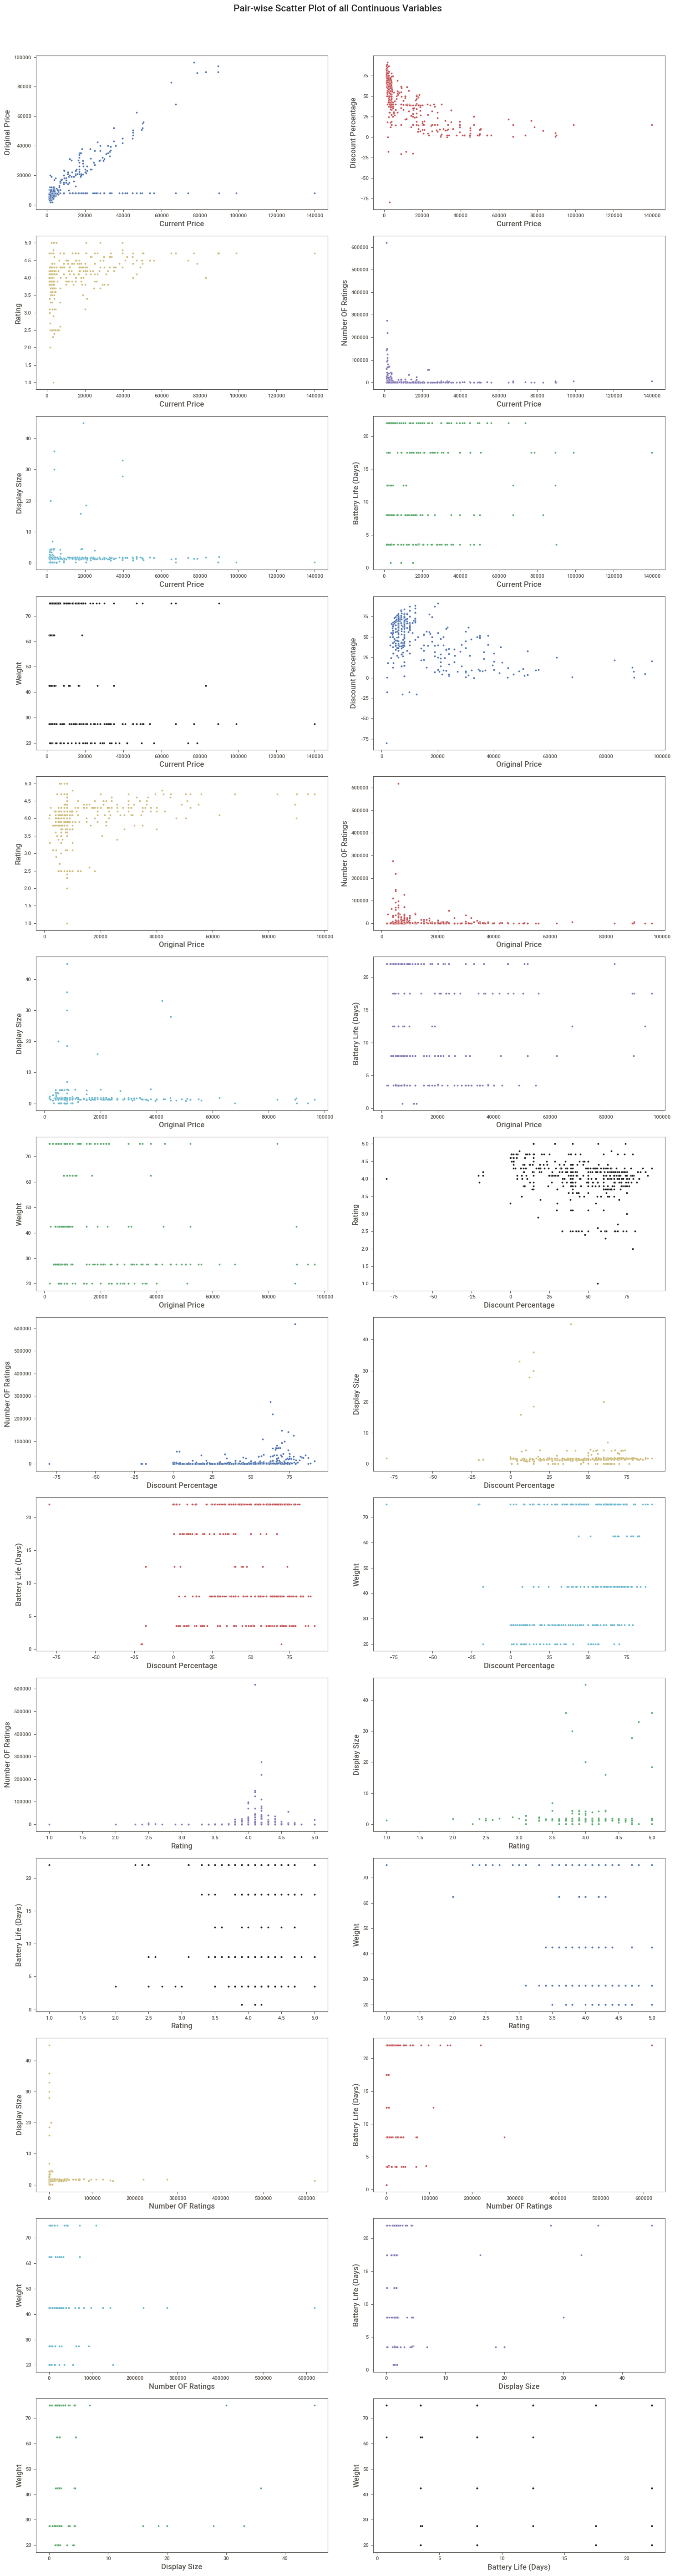

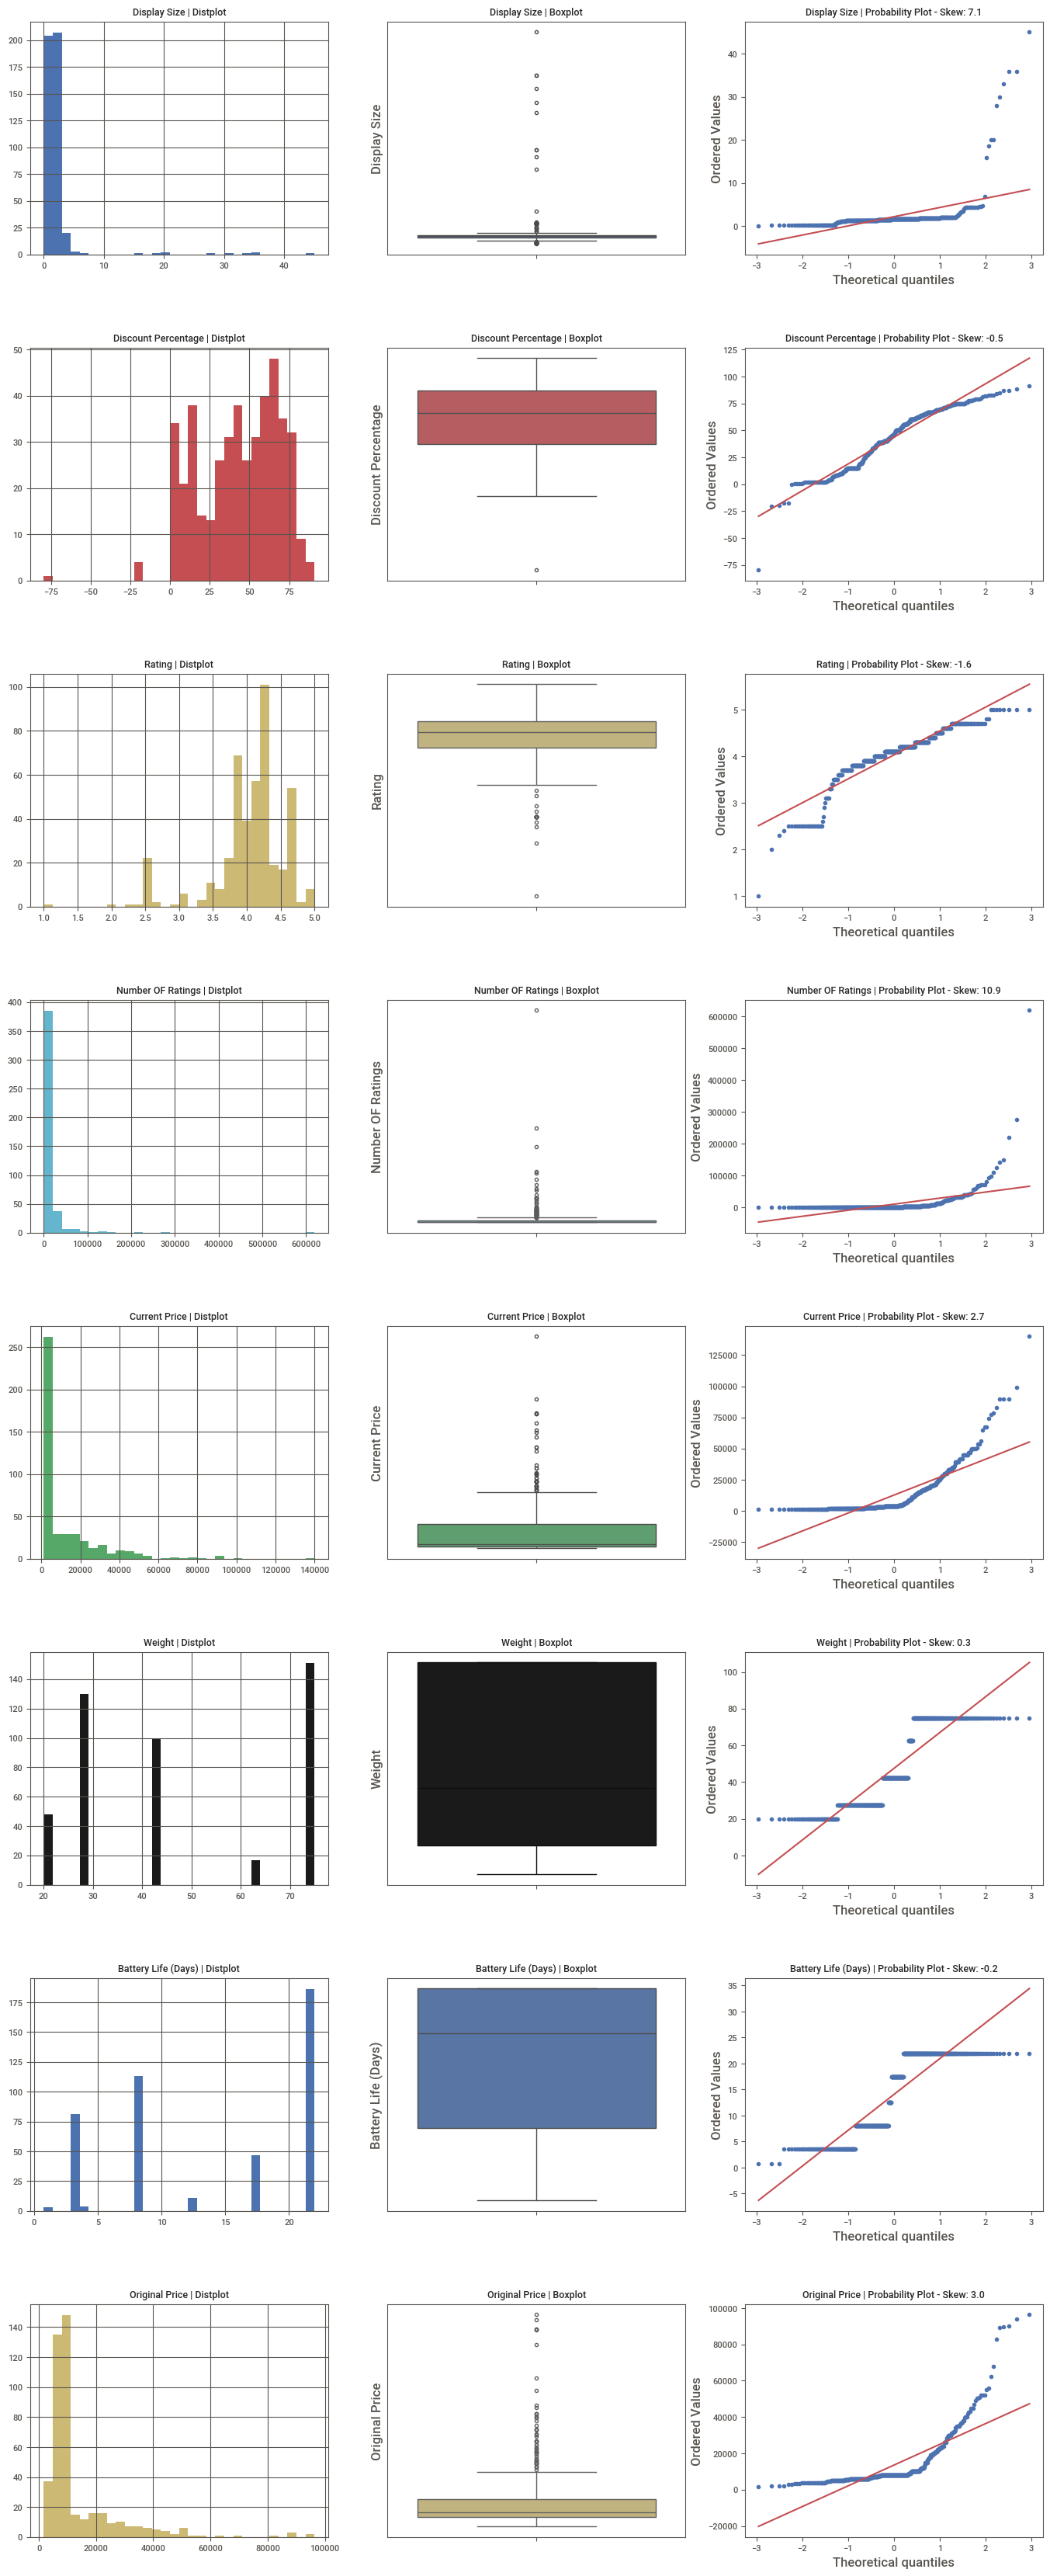

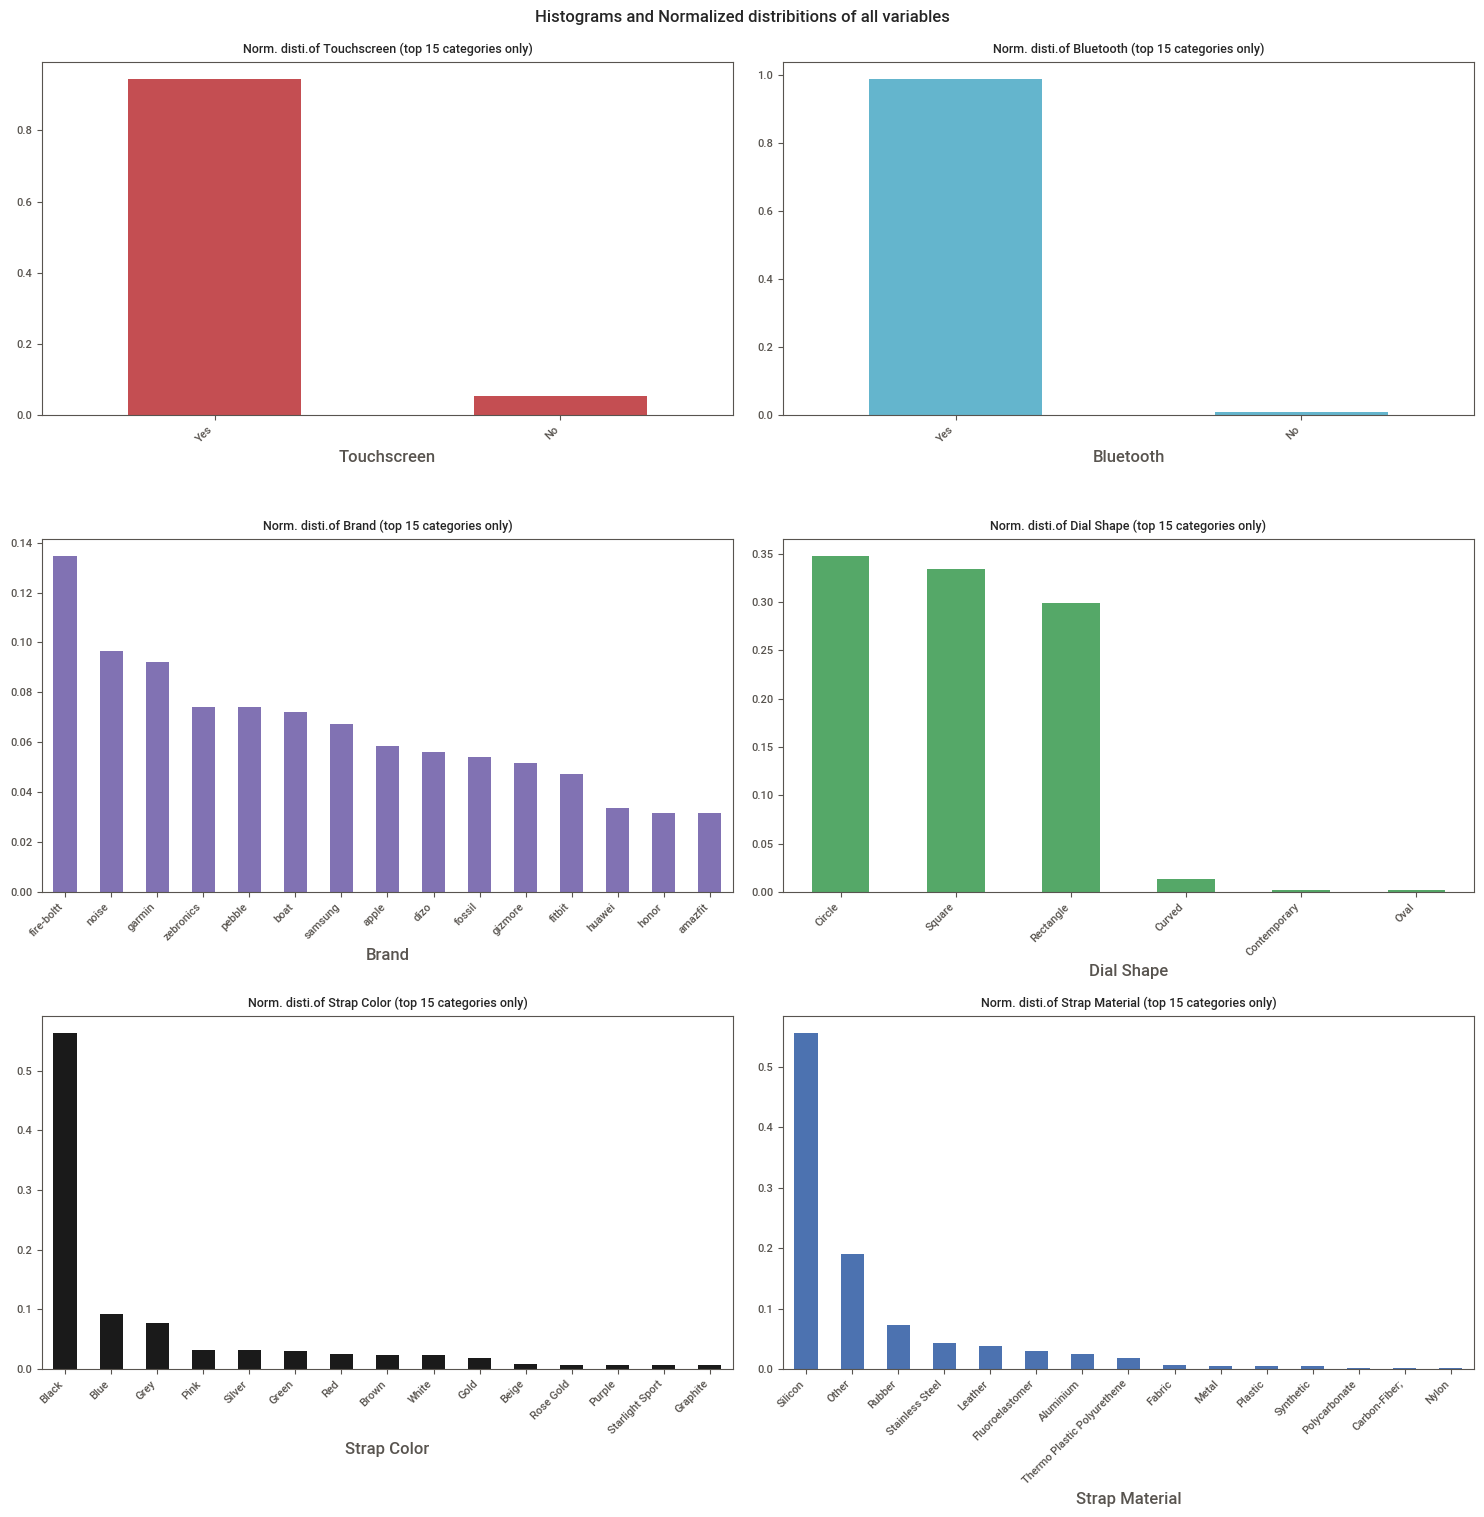

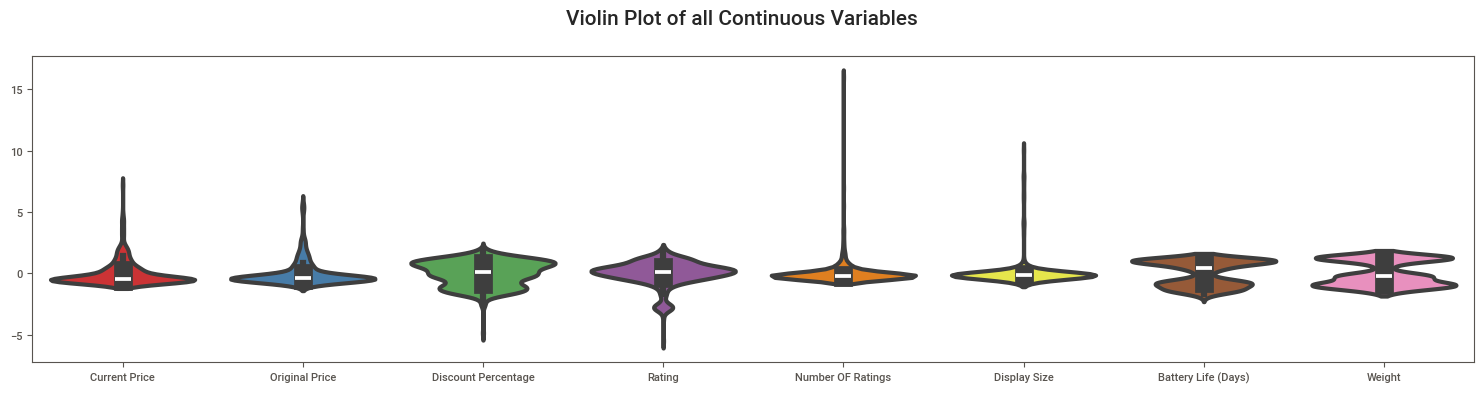

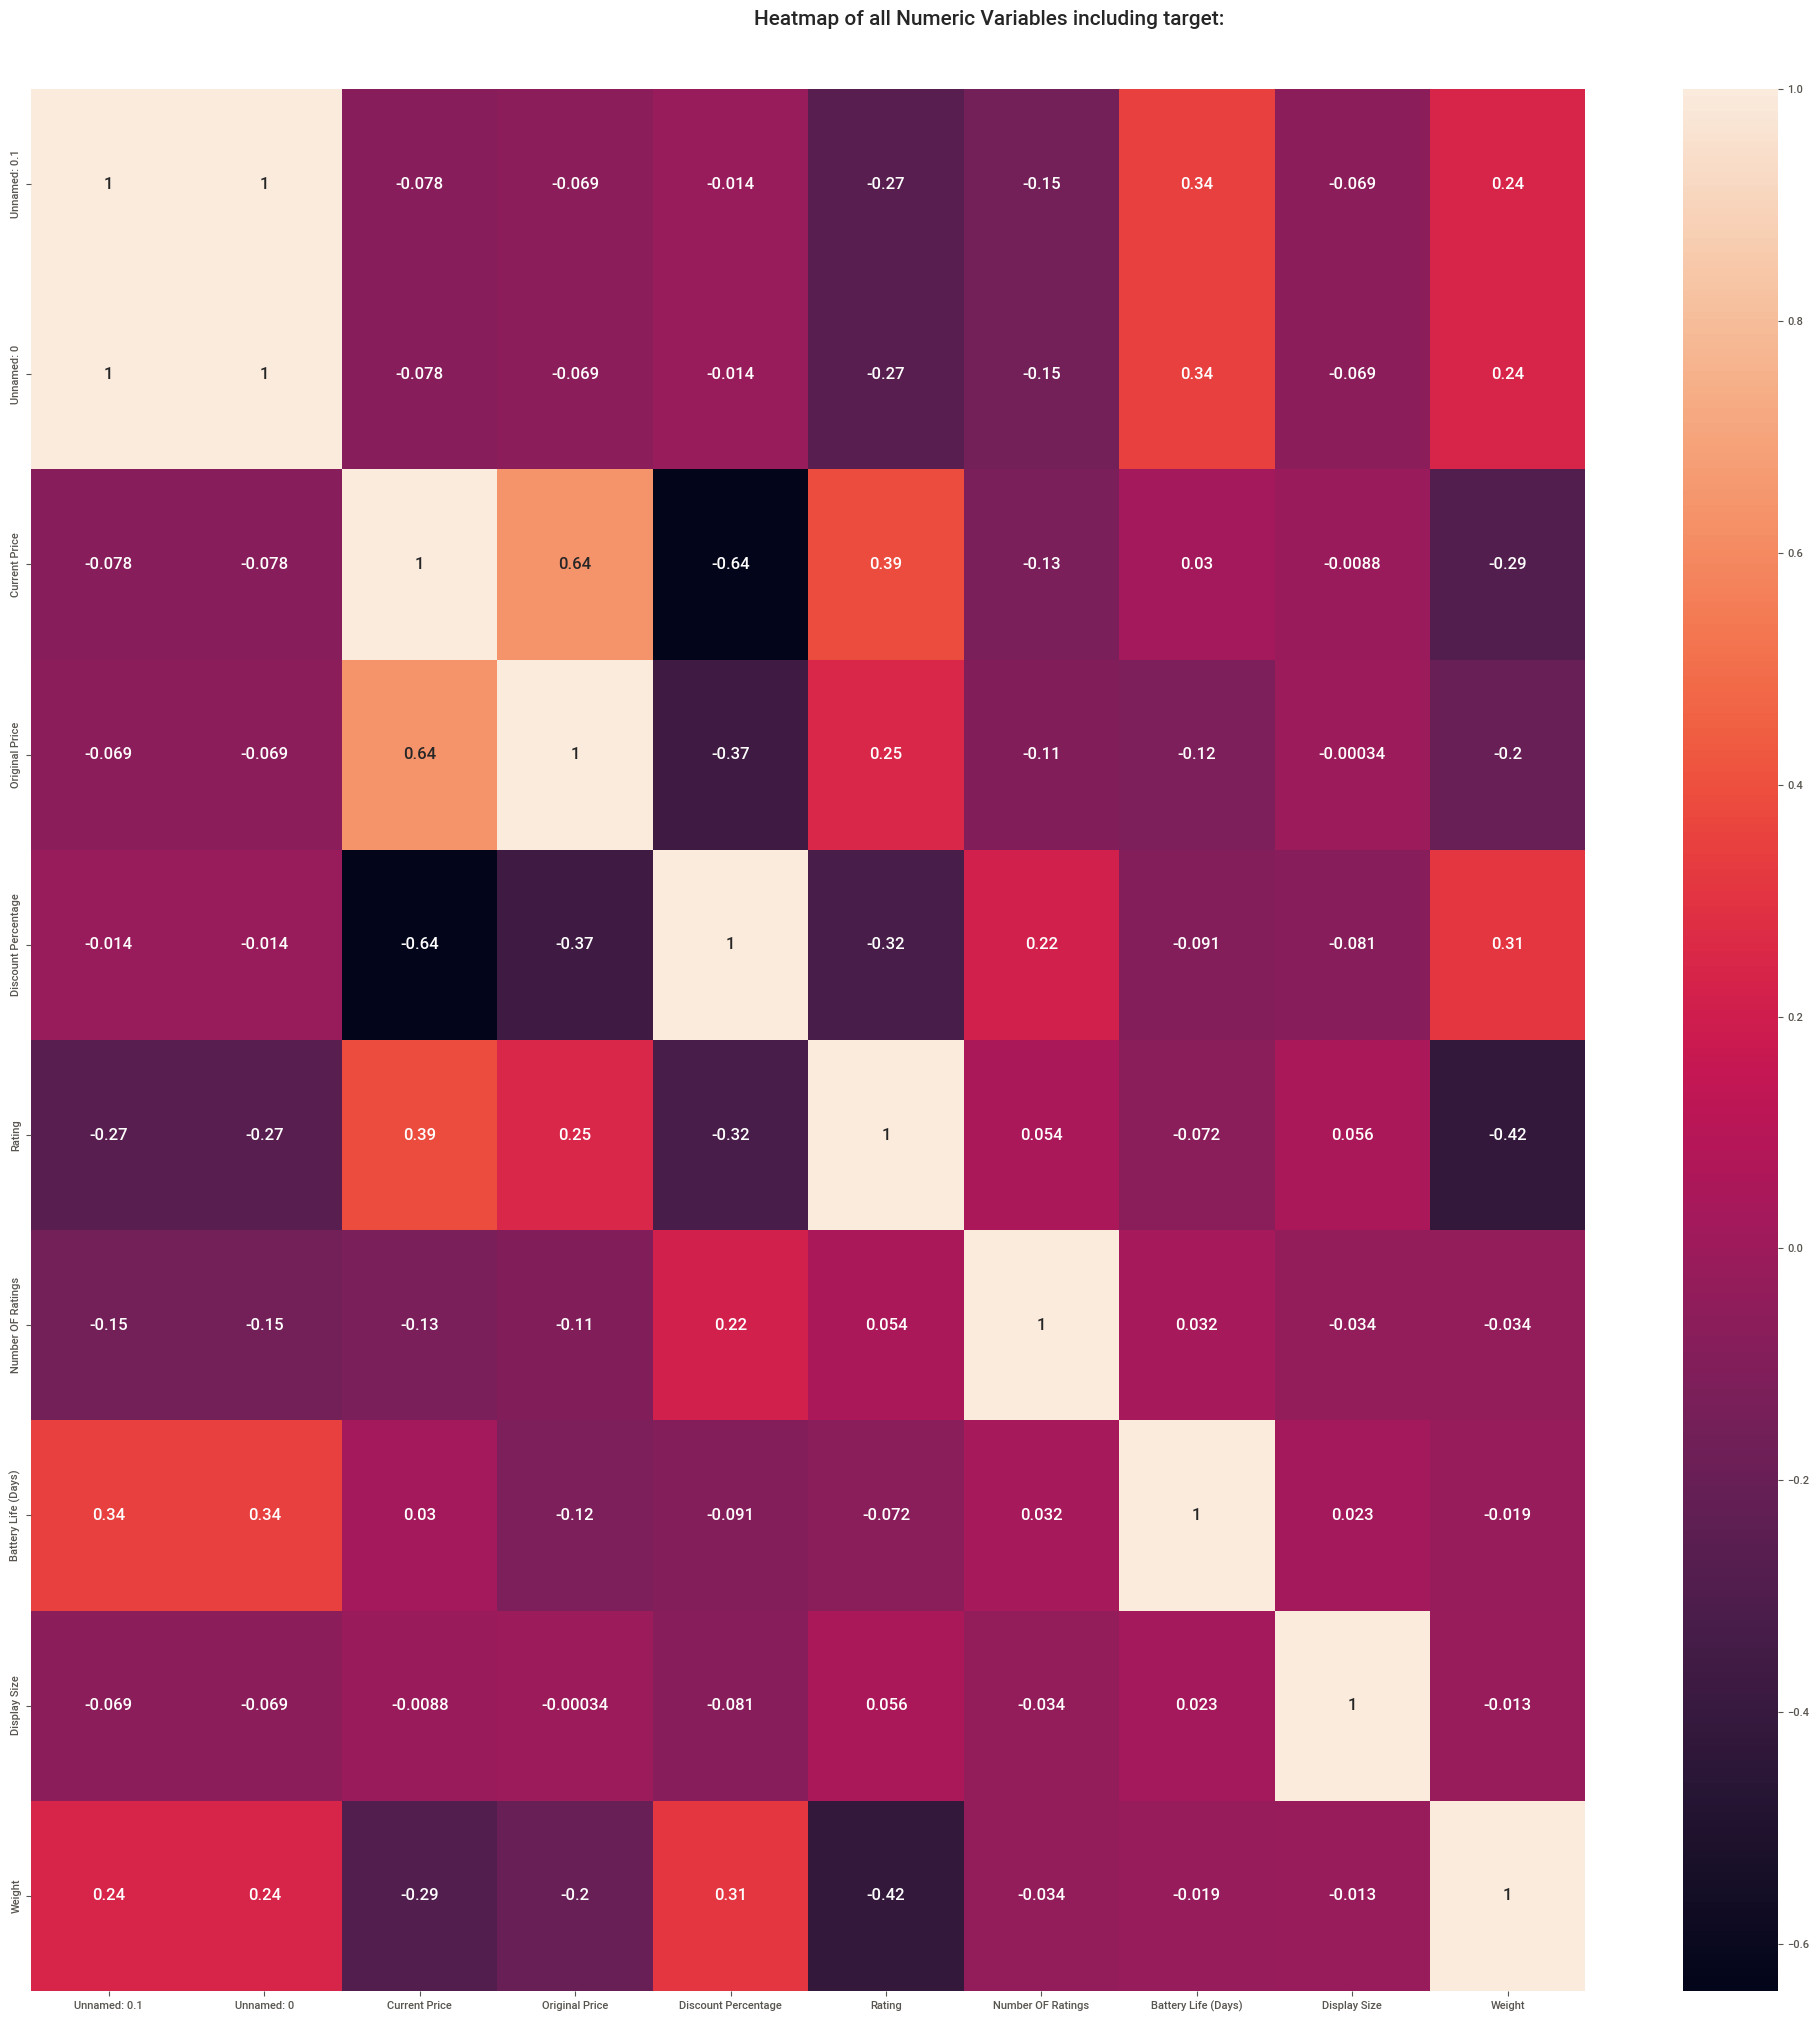

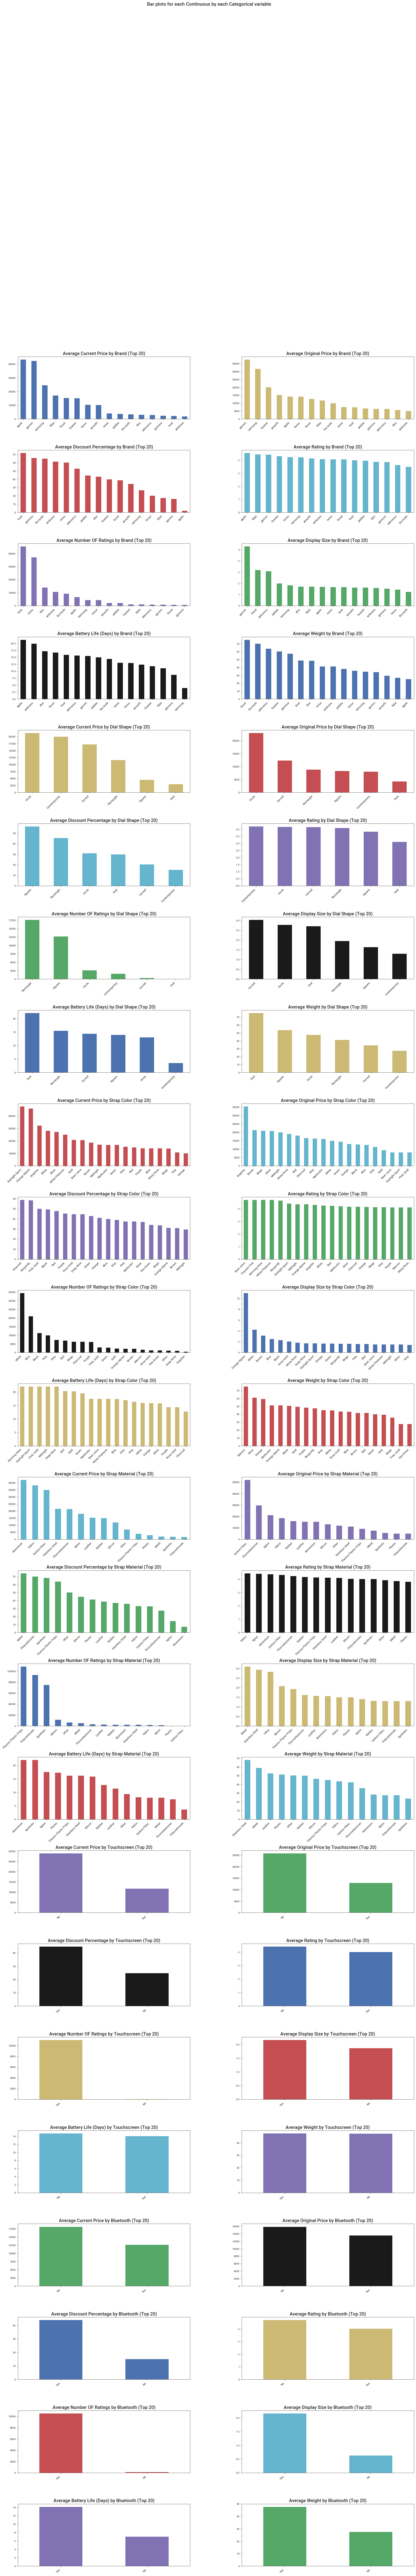

All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [1309]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
av=AutoViz_Class()
report2=av.AutoViz('clean_df.csv', sep=',')

%matplotlib inline

In [1310]:
# categorical columned dataframe
cat_col=[col for col in df2 if df2[col].dtype==object]
df_cat = df2[cat_col]  
df_cat.head()

Brand    Dial Shape Strap Color Strap Material Touchscreen Bluetooth
0       noise  Rectangle     Black         Other         Yes        Yes  
1  fire-boltt     Square     Black       Silicon         Yes        Yes  
2        boat  Rectangle     Black       Silicon         Yes        Yes  
3  fire-boltt     Square     Black       Silicon         Yes        Yes  
4       noise  Rectangle     Black         Other         Yes        Yes

In [1311]:
# non categorical columned dataframe

int_col = [col for col in df2 if df2[col].dtype != object]
df_int=df2[int_col]
df2.head()

Unnamed: 0    Brand     Current Price  Original Price  Discount Percentage  \
0       0           noise     82990.0         89900.0           7.686318        
1       1      fire-boltt      3799.0         16999.0          77.651627        
2       2            boat      1999.0          7990.0          74.981227        
3       3      fire-boltt      1799.0         19999.0          91.004550        
4       4           noise      1599.0          4999.0          68.013603        

   Rating  Number OF Ratings Dial Shape Strap Color Strap Material  \
0    4.0           65.0       Rectangle     Black         Other      
1    4.3        20788.0          Square     Black       Silicon      
2    3.8        21724.0       Rectangle     Black       Silicon      
3    4.3        13244.0          Square     Black       Silicon      
4    4.1        13901.0       Rectangle     Black         Other      

  Touchscreen  Battery Life (Days) Bluetooth  Display Size  Weight  
0      Yes             8.0             Yes         1.7       42.5   
1      Yes             3.5             Yes         1.8       62.5   
2      Yes             8.0             Yes         1.7       42.5   
3      Yes             3.5             Yes         1.8       75.0   
4      Yes             8.0             Yes         1.7       42.5

In [1312]:
df_int.corr()

Unnamed: 0  Current Price  Original Price  \
Unnamed: 0            1.000000    -0.077519       -0.069105      
Current Price        -0.077519     1.000000        0.639449      
Original Price       -0.069105     0.639449        1.000000      
Discount Percentage  -0.014409    -0.640326       -0.368663      
Rating               -0.267800     0.386921        0.246096      
Number OF Ratings    -0.154014    -0.132165       -0.106282      
Battery Life (Days)   0.343434     0.029976       -0.118872      
Display Size         -0.068893    -0.008809       -0.000341      
Weight                0.238783    -0.289991       -0.199219      

                     Discount Percentage   Rating   Number OF Ratings  \
Unnamed: 0               -0.014409       -0.267800     -0.154014        
Current Price            -0.640326        0.386921     -0.132165        
Original Price           -0.368663        0.246096     -0.106282        
Discount Percentage       1.000000       -0.324341      0.217220        
Rating                   -0.324341        1.000000      0.054239        
Number OF Ratings         0.217220        0.054239      1.000000        
Battery Life (Days)      -0.090770       -0.071601      0.032464        
Display Size             -0.080751        0.055561     -0.034470        
Weight                    0.313024       -0.416845     -0.033878        

                     Battery Life (Days)  Display Size   Weight   
Unnamed: 0                0.343434         -0.068893    0.238783  
Current Price             0.029976         -0.008809   -0.289991  
Original Price           -0.118872         -0.000341   -0.199219  
Discount Percentage      -0.090770         -0.080751    0.313024  
Rating                   -0.071601          0.055561   -0.416845  
Number OF Ratings         0.032464         -0.034470   -0.033878  
Battery Life (Days)       1.000000          0.023085   -0.019327  
Display Size              0.023085          1.000000   -0.013141  
Weight                   -0.019327         -0.013141    1.000000

<Axes: >

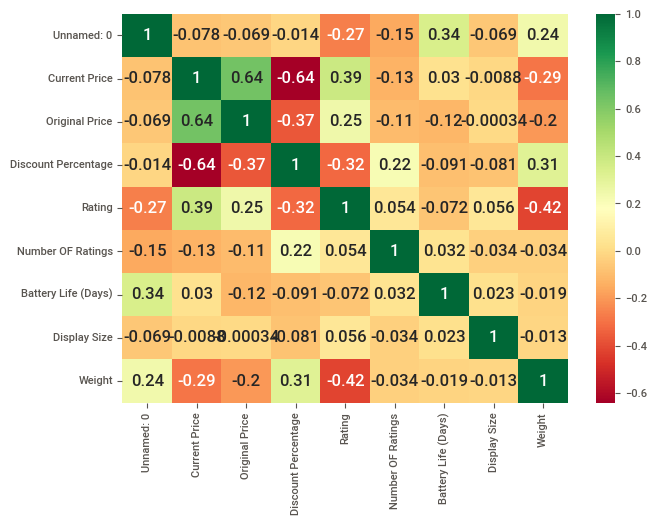

In [1313]:
sns.heatmap(df_int.corr(), annot=True, cmap='RdYlGn')

In [1314]:
df2=df2.drop(columns=['Unnamed: 0'])
df2.head()

Brand     Current Price  Original Price  Discount Percentage  Rating  \
0       noise     82990.0         89900.0           7.686318         4.0    
1  fire-boltt      3799.0         16999.0          77.651627         4.3    
2        boat      1999.0          7990.0          74.981227         3.8    
3  fire-boltt      1799.0         19999.0          91.004550         4.3    
4       noise      1599.0          4999.0          68.013603         4.1    

   Number OF Ratings Dial Shape Strap Color Strap Material Touchscreen  \
0          65.0       Rectangle     Black         Other         Yes      
1       20788.0          Square     Black       Silicon         Yes      
2       21724.0       Rectangle     Black       Silicon         Yes      
3       13244.0          Square     Black       Silicon         Yes      
4       13901.0       Rectangle     Black         Other         Yes      

   Battery Life (Days) Bluetooth  Display Size  Weight  
0          8.0             Yes         1.7       42.5   
1          3.5             Yes         1.8       62.5   
2          8.0             Yes         1.7       42.5   
3          3.5             Yes         1.8       75.0   
4          8.0             Yes         1.7       42.5

In [1315]:
df3=df2.copy()  # creating new data frame as df3

In [1316]:
[col for col in df3 if df3[col].dtype != object]

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight']

In [1317]:
num_col = df3[[col for col in df3 if df3[col].dtype != object]].columns   # numerical columns

cat_col = df3[[col for col in df3 if df3[col].dtype == object]].columns   # categorical columns

In [1318]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df3[num_col] = sc.fit_transform(df3[num_col])  # standard scaler for numerical data
df3[cat_col] =df3[cat_col]
df3.head()

Brand     Current Price  Original Price  Discount Percentage   Rating   \
0       noise    3.982301        5.300315         -1.416818       -0.055577   
1  fire-boltt   -0.501224        0.238286          1.344118        0.489975   
2        boat   -0.603134       -0.387272          1.238740       -0.419278   
3  fire-boltt   -0.614457        0.446597          1.871044        0.489975   
4       noise   -0.625781       -0.594958          0.963787        0.126274   

   Number OF Ratings Dial Shape Strap Color Strap Material Touchscreen  \
0     -0.272710       Rectangle     Black         Other         Yes      
1      0.272710          Square     Black       Silicon         Yes      
2      0.297345       Rectangle     Black       Silicon         Yes      
3      0.074155          Square     Black       Silicon         Yes      
4      0.091447       Rectangle     Black         Other         Yes      

   Battery Life (Days) Bluetooth  Display Size   Weight   
0      -0.785714           Yes     -0.105009   -0.230051  
1      -1.369285           Yes     -0.081515    0.693267  
2      -0.785714           Yes     -0.105009   -0.230051  
3      -1.369285           Yes     -0.081515    1.270341  
4      -0.785714           Yes     -0.105009   -0.230051

# Regression ('Current Price') prediction

In [1319]:
df_reg = df3.copy()
df_reg.head(5)

Brand     Current Price  Original Price  Discount Percentage   Rating   \
0       noise    3.982301        5.300315         -1.416818       -0.055577   
1  fire-boltt   -0.501224        0.238286          1.344118        0.489975   
2        boat   -0.603134       -0.387272          1.238740       -0.419278   
3  fire-boltt   -0.614457        0.446597          1.871044        0.489975   
4       noise   -0.625781       -0.594958          0.963787        0.126274   

   Number OF Ratings Dial Shape Strap Color Strap Material Touchscreen  \
0     -0.272710       Rectangle     Black         Other         Yes      
1      0.272710          Square     Black       Silicon         Yes      
2      0.297345       Rectangle     Black       Silicon         Yes      
3      0.074155          Square     Black       Silicon         Yes      
4      0.091447       Rectangle     Black         Other         Yes      

   Battery Life (Days) Bluetooth  Display Size   Weight   
0      -0.785714           Yes     -0.105009   -0.230051  
1      -1.369285           Yes     -0.081515    0.693267  
2      -0.785714           Yes     -0.105009   -0.230051  
3      -1.369285           Yes     -0.081515    1.270341  
4      -0.785714           Yes     -0.105009   -0.230051

In [1320]:
y_reg=df_reg['Original Price']
y_reg

0      5.300315
1      0.238286
2     -0.387272
3      0.446597
4     -0.594958
5     -0.664395
6     -0.594958
7     -0.664395
8     -0.490803
9     -0.525521
10    -0.525521
11    -0.664395
12    -0.386647
13    -0.525521
14    -0.525521
15    -0.594958
16    -0.594958
17    -0.525521
18    -0.525521
19    -0.525521
20    -0.664395
21    -0.525521
22    -0.387272
23    -0.387272
24    -0.387272
25    -0.456709
26    -0.456709
27    -0.387272
28    -0.387272
29    -0.387272
30    -0.387272
31    -0.456709
32    -0.594958
33    -0.456709
34    -0.594958
35    -0.456709
36    -0.526146
37    -0.490803
38    -0.386647
39     0.377160
40    -0.812366
41    -0.263466
42    -0.074181
44     0.099412
46    -0.423171
47     1.209780
48     1.696464
49    -0.386647
50     0.445972
51     1.488153
52     0.619565
53     1.591683
54    -0.386647
55     1.001468
56    -0.386647
57     2.667957
58    -0.386647
59     0.862594
60     0.480691
61     5.269763
62     2.009902
63     1.140967
64    -0

In [1321]:
x_reg=df_reg.drop(columns=['Current Price'])
x_reg

Brand     Original Price  Discount Percentage   Rating   \
0         noise     5.300315         -1.416818       -0.055577   
1    fire-boltt     0.238286          1.344118        0.489975   
2          boat    -0.387272          1.238740       -0.419278   
3    fire-boltt     0.446597          1.871044        0.489975   
4         noise    -0.594958          0.963787        0.126274   
5         noise    -0.664395          0.746829       -0.055577   
6         noise    -0.594958          0.648032        0.126274   
7         noise    -0.664395          0.450793       -0.055577   
8         noise    -0.490803          1.012239        0.126274   
9         noise    -0.525521          0.911073        0.126274   
10        noise    -0.525521          0.911073        0.126274   
11        noise    -0.664395          0.450793       -0.055577   
12        noise    -0.386647          0.351856       -0.419278   
13        noise    -0.525521         -0.075629       -0.419278   
14        noise    -0.525521          0.911073        0.126274   
15        noise    -0.594958          1.042726       -0.055577   
16        noise    -0.594958          0.805909        0.126274   
17        noise    -0.525521          0.911073        0.126274   
18        noise    -0.525521          0.911073        0.126274   
19        noise    -0.525521          0.582173       -0.964830   
20        noise    -0.664395          0.450793       -0.055577   
21        noise    -0.525521          0.253272        0.126274   
22         boat    -0.387272          0.893020        0.308125   
23         boat    -0.387272          0.991797        0.308125   
24         boat    -0.387272          1.238740       -0.419278   
25         boat    -0.456709          1.549132       -0.055577   
26         boat    -0.456709          1.210407       -0.237428   
27         boat    -0.387272          1.238740       -0.419278   
28         boat    -0.387272          0.942408        0.308125   
29         boat    -0.387272          1.238740       -0.782980   
30         boat    -0.387272          1.238740       -0.782980   
31         boat    -0.456709          1.549132       -0.055577   
32        noise    -0.594958          0.805909       -0.055577   
33         boat    -0.456709          1.266861       -0.237428   
34        noise    -0.594958          0.805909        0.126274   
35         boat    -0.456709          1.549132       -0.055577   
36         boat    -0.526146          1.271432       -0.237428   
37         boat    -0.490803          1.072958       -0.601129   
38         boat    -0.386647          1.141185       -0.055577   
39        honor     0.377160         -0.162359       -0.237428   
40        honor    -0.812366         -2.419369        0.126274   
41        honor    -0.263466         -2.417057        0.308125   
42        honor    -0.074181         -2.509425       -0.237428   
44        honor     0.099412         -0.141567        0.671826   
46        honor    -0.423171         -2.525943        0.126274   
47      samsung     1.209780          0.698111        0.126274   
48      samsung     1.696464          0.314162        0.489975   
49      samsung    -0.386647         -0.970363        0.489975   
50      samsung     0.445972         -1.327096        0.489975   
51      samsung     1.488153          0.196512        0.489975   
52       garmin     0.619565         -0.755088        0.489975   
53       garmin     1.591683         -0.800913        0.853677   
54       garmin    -0.386647         -1.128209       -0.601129   
55       garmin     1.001468         -0.451273        0.489975   
56       garmin    -0.386647         -1.128209        1.762930   
57       garmin     2.667957         -0.429796        0.489975   
58       garmin    -0.386647         -1.128209       -0.419278   
59       garmin     0.862594         -0.960965        0.489975   
60       garmin     0.480691         -1.431248       -0.964830   
61       garmin     5.269763         -1.236237 

In [1322]:
x_reg1 = pd.get_dummies(x_reg, columns=['Brand', 'Dial Shape', 'Strap Color', 'Strap Material'], drop_first=True, dtype=int)

x_reg1

Original Price  Discount Percentage   Rating   Number OF Ratings  \
0       5.300315         -1.416818       -0.055577      -0.272710       
1       0.238286          1.344118        0.489975       0.272710       
2      -0.387272          1.238740       -0.419278       0.297345       
3       0.446597          1.871044        0.489975       0.074155       
4      -0.594958          0.963787        0.126274       0.091447       
5      -0.664395          0.746829       -0.055577       0.586334       
6      -0.594958          0.648032        0.126274      -0.247628       
7      -0.664395          0.450793       -0.055577       0.586334       
8      -0.490803          1.012239        0.126274       0.764649       
9      -0.525521          0.911073        0.126274       0.764649       
10     -0.525521          0.911073        0.126274      -0.043730       
11     -0.664395          0.450793       -0.055577       0.586334       
12     -0.386647          0.351856       -0.419278      -0.260077       
13     -0.525521         -0.075629       -0.419278      -0.267025       
14     -0.525521          0.911073        0.126274      -0.035413       
15     -0.594958          1.042726       -0.055577       2.175271       
16     -0.594958          0.805909        0.126274       0.091447       
17     -0.525521          0.911073        0.126274      -0.043730       
18     -0.525521          0.911073        0.126274      -0.035413       
19     -0.525521          0.582173       -0.964830      -0.268446       
20     -0.664395          0.450793       -0.055577       0.586334       
21     -0.525521          0.253272        0.126274      -0.120030       
22     -0.387272          0.893020        0.308125       1.606927       
23     -0.387272          0.991797        0.308125       1.606927       
24     -0.387272          1.238740       -0.419278       0.297345       
25     -0.456709          1.549132       -0.055577       0.456499       
26     -0.456709          1.210407       -0.237428      -0.197278       
27     -0.387272          1.238740       -0.419278       0.297345       
28     -0.387272          0.942408        0.308125       1.606927       
29     -0.387272          1.238740       -0.782980      -0.252655       
30     -0.387272          1.238740       -0.782980      -0.252655       
31     -0.456709          1.549132       -0.055577       0.456499       
32     -0.594958          0.805909       -0.055577       1.562763       
33     -0.456709          1.266861       -0.237428       0.344036       
34     -0.594958          0.805909        0.126274       0.091447       
35     -0.456709          1.549132       -0.055577       0.456499       
36     -0.526146          1.271432       -0.237428      -0.170616       
37     -0.490803          1.072958       -0.601129      -0.265788       
38     -0.386647          1.141185       -0.055577       0.241179       
39      0.377160         -0.162359       -0.237428      -0.263735       
40     -0.812366         -2.419369        0.126274      -0.269657       
41     -0.263466         -2.417057        0.308125      -0.273894       
42     -0.074181         -2.509425       -0.237428      -0.271789       
44      0.099412         -0.141567        0.671826      -0.069339       
46     -0.423171         -2.525943        0.126274      -0.265920       
47      1.209780          0.698111        0.126274      -0.272526       
48      1.696464          0.314162        0.489975      -0.136822       
49     -0.386647         -0.970363        0.489975      -0.136822       
50      0.445972         -1.327096        0.489975      -0.136822       
51      1.488153          0.196512        0.489975      -0.136822       
52      0.619565         -0.755088        0.489975      -0.266209       
53      1.591683         -0.800913        0.853677      -0.160220       
54     -0.386647         -1.128209       -0.601129      -0.274263       
55      1.001468         -0.451273        0.489975      -0.2739

In [1323]:
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
x_reg1['Touchscreen']= ln.fit_transform(x_reg1['Touchscreen'])
x_reg1['Bluetooth']= ln.fit_transform(x_reg1['Bluetooth'])
x_reg1.head()

Original Price  Discount Percentage   Rating   Number OF Ratings  \
0     5.300315         -1.416818       -0.055577     -0.272710        
1     0.238286          1.344118        0.489975      0.272710        
2    -0.387272          1.238740       -0.419278      0.297345        
3     0.446597          1.871044        0.489975      0.074155        
4    -0.594958          0.963787        0.126274      0.091447        

   Touchscreen  Battery Life (Days)  Bluetooth  Display Size   Weight   \
0       1           -0.785714            1       -0.105009   -0.230051   
1       1           -1.369285            1       -0.081515    0.693267   
2       1           -0.785714            1       -0.105009   -0.230051   
3       1           -1.369285            1       -0.081515    1.270341   
4       1           -0.785714            1       -0.105009   -0.230051   

   Brand_ambrane  Brand_apple  Brand_boat  Brand_dizo  Brand_fire-boltt  \
0        0             0            0           0              0          
1        0             0            0           0              1          
2        0             0            1           0              0          
3        0             0            0           0              1          
4        0             0            0           0              0          

   Brand_fitbit  Brand_fossil  Brand_garmin  Brand_gizmore  Brand_honor  \
0        0             0             0             0             0        
1        0             0             0             0             0        
2        0             0             0             0             0        
3        0             0             0             0             0        
4        0             0             0             0             0        

   Brand_huawei  Brand_noise  Brand_pebble  Brand_samsung  Brand_zebronics  \
0        0            1             0             0               0          
1        0            0             0             0               0          
2        0            0             0             0               0          
3        0            0             0             0               0          
4        0            1             0             0               0          

   Dial Shape_Contemporary  Dial Shape_Curved  Dial Shape_Oval  \
0             0                     0                 0          
1             0                     0                 0          
2             0                     0                 0          
3             0                     0                 0          
4             0                     0                 0          

   Dial Shape_Rectangle  Dial Shape_Square  Strap Color_Beige  \
0            1                   0                  0           
1            0                   1                  0           
2            1                   0                  0           
3            0                   1                  0           
4            1                   0                  0           

   Strap Color_Black  Strap Color_Blue  Strap Color_Brown  \
0          1                  0                 0           
1          1                  0                 0           
2          1                  0                 0           
3          1                  0                 0           
4          1                  0                 0           

   Strap Color_Burgundy  Strap Color_Charcoal  Strap Color_Deep Wine  \
0            0                     0                     0             
1            0                     0                     0             
2            0                     0                     0             
3            0                     0                     0             
4            0                     0                     0             

   Strap Color_Gold  Strap Color_Graphite  Strap Color_Green  \
0          0                   0                   0           
1          0                   0            

In [1324]:
# splitting data into test and train

from sklearn.model_selection import train_test_split
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_reg1, y_reg, test_size=0.2, random_state=45)

In [1325]:
print(f'x_train_r : {x_train_r.shape}')
print(f'y_train_r : {y_train_r.shape}')
print(f'x_test_r : {x_test_r.shape}')
print(f'y_test_r : {y_test_r.shape}')

x_train_r : (356, 72)
y_train_r : (356,)
x_test_r : (89, 72)
y_test_r : (89,)


In [1326]:
# importing all models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


# defining models
l_r=LinearRegression()
ri_r=Ridge()
la_r=Lasso()
dt_r=DecisionTreeRegressor()
rf_r=RandomForestRegressor()
ab_r=AdaBoostRegressor()
gb_r=GradientBoostingRegressor()
kn_r=KNeighborsRegressor()
sv_r=SVR()
xg_r=XGBRegressor()

# models
reg_models=[l_r, ri_r, la_r, dt_r, rf_r, ab_r, gb_r, kn_r, sv_r, xg_r]

from sklearn.metrics import mean_squared_error, r2_score
R2_Score=[]
mean_square_error=[]
for model in reg_models:
    model.fit(x_train_r, y_train_r)
    y_pred_r = model.predict(x_test_r)
    R2_score = r2_score(y_test_r, y_pred_r)
    mse = mean_squared_error(y_test_r, y_pred_r)

    # accuracy.append(accu_score)
    # mean_square_error.append(mse)

    print(f'{model} : {R2_score} : {mse}')

LinearRegression() : 0.999910722762789 : 4.0136852045508174e-05
Ridge() : 0.9999680551485313 : 1.4361620241330074e-05
Lasso() : 0.15363449516643413 : 0.3805051332812946
DecisionTreeRegressor() : 0.9994878203048632 : 0.00023026340517070515
RandomForestRegressor() : 0.999694080096253 : 0.0001375340713720803
AdaBoostRegressor() : 0.9910057660221817 : 0.004043586581622189
GradientBoostingRegressor() : 0.9998452705844283 : 6.956254308380439e-05
KNeighborsRegressor() : 0.754490446936354 : 0.1103750621649967
SVR() : 0.9197175878425722 : 0.03609299973078772
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step

# Ridge is best model

### 'neg_mean_squared_error'

In [1327]:
params={'alpha':[1e-10,1e-8,1e-6,1e-4,1e-2,1,2,4,6,8]}

from sklearn.model_selection import GridSearchCV
gsc_mse_r=GridSearchCV(ri_r, params, cv=5, scoring='neg_mean_squared_error')
gsc_mse_r.fit(x_train_r, y_train_r)
gsc_mse_r

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1, 2, 4,
                                   6, 8]},
             scoring='neg_mean_squared_error')

In [1328]:
print(f'best_params_ : {gsc_mse_r.best_params_}')
print(f'best_score_  : {gsc_mse_r.best_score_}')
print(f'best_estimator_  : {gsc_mse_r.best_estimator_}')

best_params_ : {'alpha': 1e-08}
best_score_  : -4.116260495976806e-17
best_estimator_  : Ridge(alpha=1e-08)


### Final Model Evaluation

In [1329]:
# model = Ridge(alpha= 1e-06)
# model.fit(x_train_r, y_train_r)     OR

r_r_f= gsc_mse_r.best_estimator_
print(f'final model : {r_r_f}')

y_pred_r_f = r_r_f.predict(x_test_r)
print(f'final model r2_score : {r2_score(y_test_r, y_pred_r_f)}')
print(f'final model MSE : {mean_squared_error(y_test_r, y_pred_r_f)}')

final model : Ridge(alpha=1e-08)
final model r2_score : 0.9999999999999997
final model MSE : 1.6435027490511507e-16


### Feature Importance

In [1330]:
# The coefficients derived from your regression model provide essential insights into 
# the relationships between features and the target variable.

Feature_importance = pd.DataFrame({'Feature': x_train_r.columns, 'Coefficient': r_r_f.coef_.flatten()})

Feature_importance['Absolute_coefficient'] = Feature_importance.Coefficient.abs() # absolute coefficient values
Feature_importance

Feature                     Coefficient  \
0                               Original Price  1.000000e+00   
1                          Discount Percentage -4.377106e-12   
2                                       Rating  2.330708e-12   
3                            Number OF Ratings  2.120021e-13   
4                                  Touchscreen  3.221231e-11   
5                          Battery Life (Days) -2.630949e-12   
6                                    Bluetooth  1.354414e-11   
7                                 Display Size -8.170932e-12   
8                                       Weight -3.505210e-12   
9                                Brand_ambrane -3.513361e-11   
10                                 Brand_apple -1.136153e-11   
11                                  Brand_boat -2.102334e-11   
12                                  Brand_dizo -3.326568e-11   
13                            Brand_fire-boltt -1.120110e-12   
14                                Brand_fitbit -6.614008e-12   
15                                Brand_fossil  1.548608e-11   
16                                Brand_garmin  1.119325e-10   
17                               Brand_gizmore -2.020992e-11   
18                                 Brand_honor -1.969090e-11   
19                                Brand_huawei  1.550139e-11   
20                                 Brand_noise -2.327495e-11   
21                                Brand_pebble -2.930870e-11   
22                               Brand_samsung  6.485968e-11   
23                             Brand_zebronics -1.921700e-11   
24                     Dial Shape_Contemporary -4.626203e-11   
25                           Dial Shape_Curved -8.876333e-12   
26                             Dial Shape_Oval  0.000000e+00   
27                        Dial Shape_Rectangle -7.764895e-12   
28                           Dial Shape_Square -1.565768e-11   
29                           Strap Color_Beige  5.407894e-08   
30                           Strap Color_Black  5.411131e-08   
31                            Strap Color_Blue  5.410312e-08   
32                           Strap Color_Brown  5.413693e-08   
33                        Strap Color_Burgundy  5.409388e-08   
34                        Strap Color_Charcoal  5.413436e-08   
35                       Strap Color_Deep Wine  5.410243e-08   
36                            Strap Color_Gold  5.410155e-08   
37                        Strap Color_Graphite  5.410129e-08   
38                           Strap Color_Green  5.411785e-08   
39                            Strap Color_Grey  5.411865e-08   
40                          Strap Color_Maroon  5.411512e-08   
41                        Strap Color_Midnight  5.417526e-08   
42                      Strap Color_Misty Rose  5.413010e-08   
43                    Strap Color_Morning Glow  0.000000e+00   
44                      Strap Color_Multicolor  5.415832e-08   
45                          Strap Color_Orange  5.410136e-08   
46                   Strap Color_Orange Alpine  5.411049e-08   
47                    Strap Color_Passion Pink  5.408214e-08   
48                            Strap Color_Pink  5.409986e-08   
49                      Strap Color_Pink, Gold  5.412083e-08   
50                          Strap Color_Purple  0.000000e+00   
51                             Strap Color_Red  5.411622e-08   
52                       Strap Color_Rose Gold  5.410385e-08   
53                       Strap Color_Sea Green  5.410144e-08   
54                          Strap Color_Silver  5.414330e-08   
55                 Strap Color_Starlight Sport  5.408583e-08   
56                           Strap Color_White  5.406686e-08   
57                  Strap Color_White Platinum  5.408986e-08   
58                Strap Material_Carbon-Fiber;  1.069732e-11   
59                       Strap Material_Fabric -1.622245e-11   
60              Strap Material_Fluoroelastomer -1.480023e-11   
61                      Strap Material_Leather -4.025

In [1331]:
final_feature_importance = Feature_importance.sort_values(by='Absolute_coefficient', ascending=False)
final_feature_importance

Feature                     Coefficient  \
0                               Original Price  1.000000e+00   
41                        Strap Color_Midnight  5.417526e-08   
44                      Strap Color_Multicolor  5.415832e-08   
54                          Strap Color_Silver  5.414330e-08   
32                           Strap Color_Brown  5.413693e-08   
34                        Strap Color_Charcoal  5.413436e-08   
42                      Strap Color_Misty Rose  5.413010e-08   
49                      Strap Color_Pink, Gold  5.412083e-08   
39                            Strap Color_Grey  5.411865e-08   
38                           Strap Color_Green  5.411785e-08   
51                             Strap Color_Red  5.411622e-08   
40                          Strap Color_Maroon  5.411512e-08   
30                           Strap Color_Black  5.411131e-08   
46                   Strap Color_Orange Alpine  5.411049e-08   
52                       Strap Color_Rose Gold  5.410385e-08   
31                            Strap Color_Blue  5.410312e-08   
35                       Strap Color_Deep Wine  5.410243e-08   
36                            Strap Color_Gold  5.410155e-08   
53                       Strap Color_Sea Green  5.410144e-08   
45                          Strap Color_Orange  5.410136e-08   
37                        Strap Color_Graphite  5.410129e-08   
48                            Strap Color_Pink  5.409986e-08   
33                        Strap Color_Burgundy  5.409388e-08   
57                  Strap Color_White Platinum  5.408986e-08   
55                 Strap Color_Starlight Sport  5.408583e-08   
47                    Strap Color_Passion Pink  5.408214e-08   
29                           Strap Color_Beige  5.407894e-08   
56                           Strap Color_White  5.406686e-08   
16                                Brand_garmin  1.119325e-10   
22                               Brand_samsung  6.485968e-11   
24                     Dial Shape_Contemporary -4.626203e-11   
69              Strap Material_Stainless Steel -4.042129e-11   
61                      Strap Material_Leather -4.025631e-11   
66                Strap Material_Polycarbonate -3.536982e-11   
9                                Brand_ambrane -3.513361e-11   
12                                  Brand_dizo -3.326568e-11   
4                                  Touchscreen  3.221231e-11   
21                                Brand_pebble -2.930870e-11   
71  Strap Material_Thermo Plastic Polyurethene -2.360731e-11   
20                                 Brand_noise -2.327495e-11   
63                        Strap Material_Nylon  2.108210e-11   
11                                  Brand_boat -2.102334e-11   
17                               Brand_gizmore -2.020992e-11   
18                                 Brand_honor -1.969090e-11   
23                             Brand_zebronics -1.921700e-11   
65                      Strap Material_Plastic -1.873048e-11   
64                        Strap Material_Other -1.747770e-11   
68                      Strap Material_Silicon -1.723404e-11   
59                       Strap Material_Fabric -1.622245e-11   
28                           Dial Shape_Square -1.565768e-11   
19                                Brand_huawei  1.550139e-11   
15                                Brand_fossil  1.548608e-11   
60              Strap Material_Fluoroelastomer -1.480023e-11   
6                                    Bluetooth  1.354414e-11   
70                    Strap Material_Synthetic -1.278012e-11   
62                        Strap Material_Metal -1.253524e-11   
10                                 Brand_apple -1.136153e-11   
67                       Strap Material_Rubber -1.112984e-11   
58                Strap Material_Carbon-Fiber;  1.069732e-11   
25                           Dial Shape_Curved -8.876333e-12   
7                                 Display Size -8.170932e-12   
27                        Dial Shape_Rectangle -7.764

## Residual Analysis

In [1339]:
#making residual dataframe

residual_df_r=pd.DataFrame({'Actual':y_test_r , 'y_pred_r':y_pred_r_f,'residual':(y_test_r-y_pred_r_f)})
residual_df_r

Actual   y_pred_r    residual  
162 -0.525521 -0.525521  9.087175e-13
410 -0.525521 -0.525521 -1.664147e-11
448 -0.386647 -0.386647 -2.186029e-13
400 -0.560240 -0.560240 -6.296186e-12
173 -0.456709 -0.456709  5.411136e-08
211 -0.386647 -0.386647 -1.108628e-10
323 -0.699114 -0.699114  7.430834e-12
356 -0.525521 -0.525521  5.228373e-12
14  -0.525521 -0.525521 -9.442780e-12
133 -0.386647 -0.386647 -2.427353e-11
373 -0.456084 -0.456084  2.288281e-12
107 -0.386647 -0.386647  1.357603e-11
407 -0.650508 -0.650508  3.823830e-12
363 -0.247773 -0.247773 -5.928730e-11
338 -0.525521 -0.525521 -1.924239e-11
331 -0.525521 -0.525521  4.829803e-12
81  -0.525521 -0.525521  5.453304e-12
266  2.181898  2.181898  9.192158e-11
154 -0.456084 -0.456084 -1.475398e-11
195  1.557590  1.557590  3.898881e-12
330 -0.456084 -0.456084  2.341960e-12
38  -0.386647 -0.386647  7.898626e-12
299  0.099134  0.099134  1.664804e-11
267 -0.386647 -0.386647 -1.548977e-10
50   0.445972  0.445972 -5.764528e-11
71  -0.386647 -0.386647 -1.956474e-11
25  -0.456709 -0.456709 -2.493450e-12
66  -0.525521 -0.525521 -3.070877e-13
301  0.585193  0.585193  4.814127e-11
184  0.377160  0.377160  5.375284e-11
130 -0.386647 -0.386647 -1.617156e-11
405 -0.386647 -0.386647 -4.015360e-11
303  0.654630  0.654630  7.433132e-11
265  1.626402  1.626402 -6.482370e-12
106 -0.525521 -0.525521  4.309109e-12
171 -0.526146 -0.526146 -1.125533e-11
221 -0.386647 -0.386647  5.408178e-08
291  0.445972  0.445972  4.174772e-12
63   1.140967  1.140967  3.519052e-11
434 -0.525521 -0.525521 -2.197131e-11
441 -0.594958 -0.594958 -2.374168e-11
345 -0.456084 -0.456084  1.824207e-12
4   -0.594958 -0.594958 -1.352340e-11
54  -0.386647 -0.386647 -8.117362e-11
352 -0.594958 -0.594958  3.781531e-12
93  -0.421366 -0.421366  1.207845e-11
153 -0.664395 -0.664395  3.165745e-11
22  -0.387272 -0.387272 -1.596612e-12
161 -0.594958 -0.594958 -1.825906e-11
219 -0.386647 -0.386647 -2.307105e-11
244  0.377160  0.377160 -1.737499e-12
396 -0.594958 -0.594958 -3.347878e-12
421 -0.386647 -0.386647 -1.575701e-11
236 -0.386647 -0.386647 -2.710299e-11
263  2.563802  2.563802  5.975132e-11
231 -0.386647 -0.386647 -2.594547e-11
378 -0.560240 -0.560240  3.923417e-12
213  1.452809  1.452809 -2.427858e-11
311 -0.386647 -0.386647 -2.311928e-12
104 -0.178336 -0.178336  2.426684e-11
268 -0.386647 -0.386647 -1.224682e-10
52   0.619565  0.619565 -8.944545e-11
290  0.584846  0.584846  7.362111e-12
227 -0.386647 -0.386647 -3.273065e-11
202 -0.386647 -0.386647 -8.738210e-11
123 -0.386647 -0.386647  6.164513e-13
138  0.717471  0.717471  8.388656e-11
134 -0.386647 -0.386647  2.445322e-12
13  -0.525521 -0.525521 -1.263301e-11
264  1.244498  1.244498 -2.708500e-11
355 -0.574127 -0.574127  7.714163e-12
20  -0.664395 -0.664395 -1.954226e-11
10  -0.525521 -0.525521 -9.249046e-12
341 -0.525521 -0.525521 -6.272871e-12
113 -0.247773 -0.247773 -4.942075e-12
139 -0.386647 -0.386647 -4.315337e-11
230 -0.386647 -0.386647  5.408624e-08
297 -0.386647 -0.386647 -9.156759e-11
333 -0.456084 -0.456084 -1.104794e-11
294 -0.386647 -0.386647  5.406567e-08
224 -0.386647 -0.386647  5.408986e-08
28  -0.387272 -0.387272  6.423750e-13
251 -0.386647 -0.386647 -1.671758e-10
360 -0.678283 -0.678283 -2.335909e-12
185  0.168849  0.168849  4.211687e-12
255  1.591683  1.591683 -6.664003e-12
413 -0.247773 -0.247773  8.246792e-12
354 -0.525521 -0.525521  1.542555e-11
393 -0.386647 -0.386647 -3.093026e-11

<Axes: xlabel='y_pred_r', ylabel='residual'>

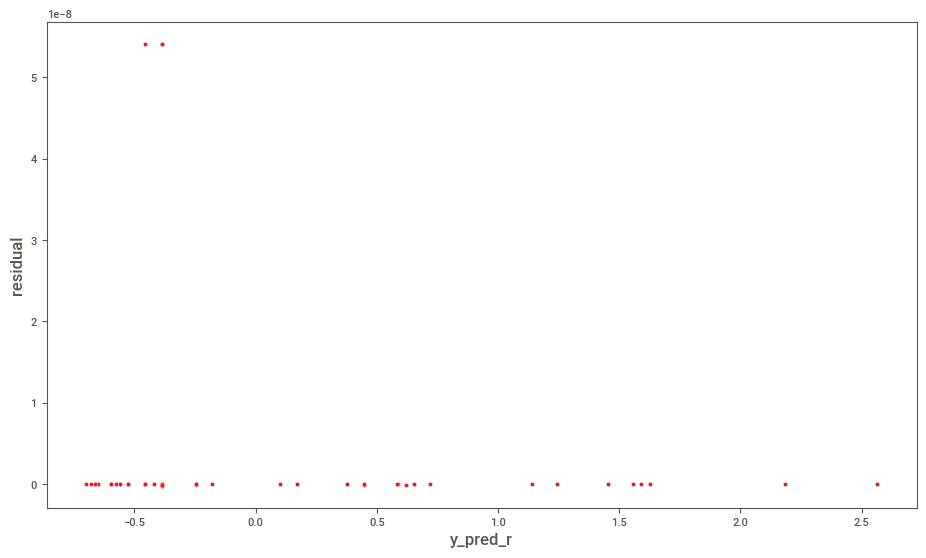

In [1343]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=residual_df_r['y_pred_r'], y=residual_df_r['residual'])
# plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='residual', ylabel='Count'>

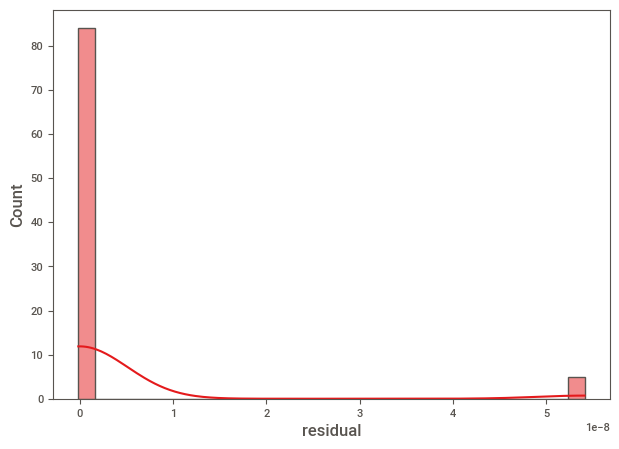

In [1348]:
sns.histplot(residual_df_r['residual'], bins=30, kde=True)

## Saving the machine learning model

In [1352]:
import pickle

pickle.dump(r_r_f, open('r_r_f.pickle', 'wb'))   # saving the model

In [1353]:
pickle.load(open('r_r_f.pickle', 'rb'))  # loading the model

Ridge(alpha=1e-08)